With this notebook I try to read the json traces files and create the graph. Moreover I compute some statistics like mean diameter, mean number of entities, mean number of relations, etc. Also the variance inside a trace is computed and it is often 0, except for the number of relation types. It means that a group of traces is just the same trace repeated.
Nodes are created from services and edges are created from operations.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /gdrive/MyDrive/Gianluca\ -\ Master\ Thesis

/gdrive/MyDrive/Gianluca - Master Thesis


In [ ]:
!tar -xzf data/MSCallGraph/MSCallGraph_0.tar.gz

This function is used to inspect a trace by computing the statistics and showing one sample graph.

In [ ]:
def inspect_trace(path):
    import json
    
    import networkx as nx
    import matplotlib.pyplot as plt
    from statistics import mean, stdev
    # Opening JSON file
    f = open(path)

    # returns JSON object as 
    # a dictionary
    data = json.load(f)

    # Closing file
    f.close()
    content = data['data']
    n_traces = len(content)
    print("The number of traces is: ",n_traces)
    avg_shortest_paths = []
    avg_clustering = []
    diameters = []
    avg_entities = []
    avg_relations = []
    for elem in content:
        first = elem
        second = first['spans']

        triplets = [] #head, link, tail ---> process(spanID), operationName, process(references_spanID)

        dict_span_process = {}
        for elem in second:
            dict_span_process[elem['spanID']] = first['processes'][elem['processID']]['serviceName']

        root = first['traceID']

        for elem in second:
            head = elem['spanID']
            link = elem['operationName']
            tail = None
            if head != root:
                tail = elem['references'][0]['spanID']
                triplets.append([dict_span_process[head],link,dict_span_process[tail]])


        # Create a graph object
        G = nx.Graph()

        services_set= set() #entities set
        operations_set = set() #relations set
        for triplet in triplets:
            services_set.add(triplet[0])
            services_set.add(triplet[2])
            operations_set.add(triplet[1])
        labelsDict = {}
        for elem in services_set:
            G.add_node(elem)
            labelsDict[elem] = elem
        for triplet in triplets:
            G.add_edge(triplet[0], triplet[2], label=triplet[1])

        node_size = 5000
        font_size = 15
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2')
        fig = plt.figure(1, figsize=(20, 20), dpi=400)
        # Use NetworkX's built-in drawing function to visualize the graph
        # nx.draw(G)
        pos = nx.spring_layout(G,seed = 545)

        avg_shortest_paths.append(nx.average_shortest_path_length(G))
        avg_clustering.append(nx.average_clustering(G))
        diameters.append(nx.diameter(G))
        avg_entities.append(len(services_set))
        avg_relations.append(len(operations_set))
        
        
    first = content[0]
    second = first['spans']

    triplets = [] #head, link, tail ---> process(spanID), operationName, process(references_spanID)
    
    dict_span_process = {}
    for elem in second:
        dict_span_process[elem['spanID']] = first['processes'][elem['processID']]['serviceName']

    root = first['traceID']

    for elem in second:
        head = elem['spanID']
        link = elem['operationName']
        tail = None
        if head != root:
            tail = elem['references'][0]['spanID']
            triplets.append([dict_span_process[head],link,dict_span_process[tail]])
        


    # Create a graph object
    G = nx.Graph()
    
    services_set= set() #entities set
    operations_set = set() #relations set
    for triplet in triplets:
        services_set.add(triplet[0])
        services_set.add(triplet[2])
        operations_set.add(triplet[1])
    labelsDict = {}
    for elem in services_set:
        G.add_node(elem)
        labelsDict[elem] = elem
    for triplet in triplets:
        G.add_edge(triplet[0], triplet[2], label=triplet[1])

    node_size = 5000
    font_size = 15
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2')
    fig = plt.figure(1, figsize=(20, 20), dpi=400)
    # Use NetworkX's built-in drawing function to visualize the graph
    # nx.draw(G)
    pos = nx.spring_layout(G,seed = 545)
    
    print("The mean average shortest path lenght is: ",mean(avg_shortest_paths), " ,standard deviation: ", stdev(avg_shortest_paths))
    print("The mean average clustering coefficient is: ",mean(avg_clustering) , " ,standard deviation: ", stdev(avg_clustering))
    print("The mean diameter is: ", mean(diameters) , " ,standard deviation: ", stdev(diameters))
    print("The mean number of entities is: ", mean(avg_entities), " ,standard deviation: ", stdev(avg_entities))
    print("The mean number of relations is: ", mean(avg_relations), " ,standard deviation: ", stdev(avg_relations))
    print("This is an example of this trace")
    nx.draw_networkx_edges(G,pos,arrowstyle="-|>",arrowsize=10,width=1,arrows=True,node_size=node_size)
#     nx.draw_networkx_nodes(G,pos,node_size = node_size,labels=labelsDict, with_labels = True)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'label'),font_size = font_size,bbox = bbox,
                                verticalalignment = 'center_baseline')

    nx.draw(G,pos, labels=labelsDict, with_labels = True,node_size=node_size,font_size = font_size,bbox = bbox,node_color='k')

    # Import matplotlib library to show the graph
    plt.show()


In [ ]:
import os
from os import listdir
from os.path import isfile, join
mypath= os.getcwd() + '/social-network/sample-rate-20' 
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles

['jaeger-query.json',
 'metadata.txt',
 'nginx-web-server.json',
 'post-storage-service.json',
 'social-graph-service.json',
 'user-service.json',
 'user-timeline-service.json']

'jaeger-query.json', and 'metadata.txt' are not traces

the only json file read finishes with "total":0,"limit":0,"offset":0,"errors":null}
the others seem to be cut off


reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-20/jaeger-query.json
tail: e":"string","value":"Go-2.30.0"}]}},"warnings":null}],"total":0,"limit":0,"offset":0,"errors":null}

The number of traces is:  63
reading failed:  the null graph has no paths, thus there is no averageshortest path length

reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-20/metadata.txt
tail: Benchmark: Social Network
Sampling rate: .20
Request rate: 2000 reqs/sec
Duration: 30mins
reading failed:  Expecting value: line 1 column 1 (char 0)

reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-20/nginx-web-server.json
tail: 9f36698167d","flags":1,"operationName":"post_storage_read_posts_server","references":[{"refType":"CH
reading failed:  Unterminated string starting at: line 1 column 87400300 (char 87400299)

reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-20/post-storage-service.json
tail: 978d95-tx7l5"},{"

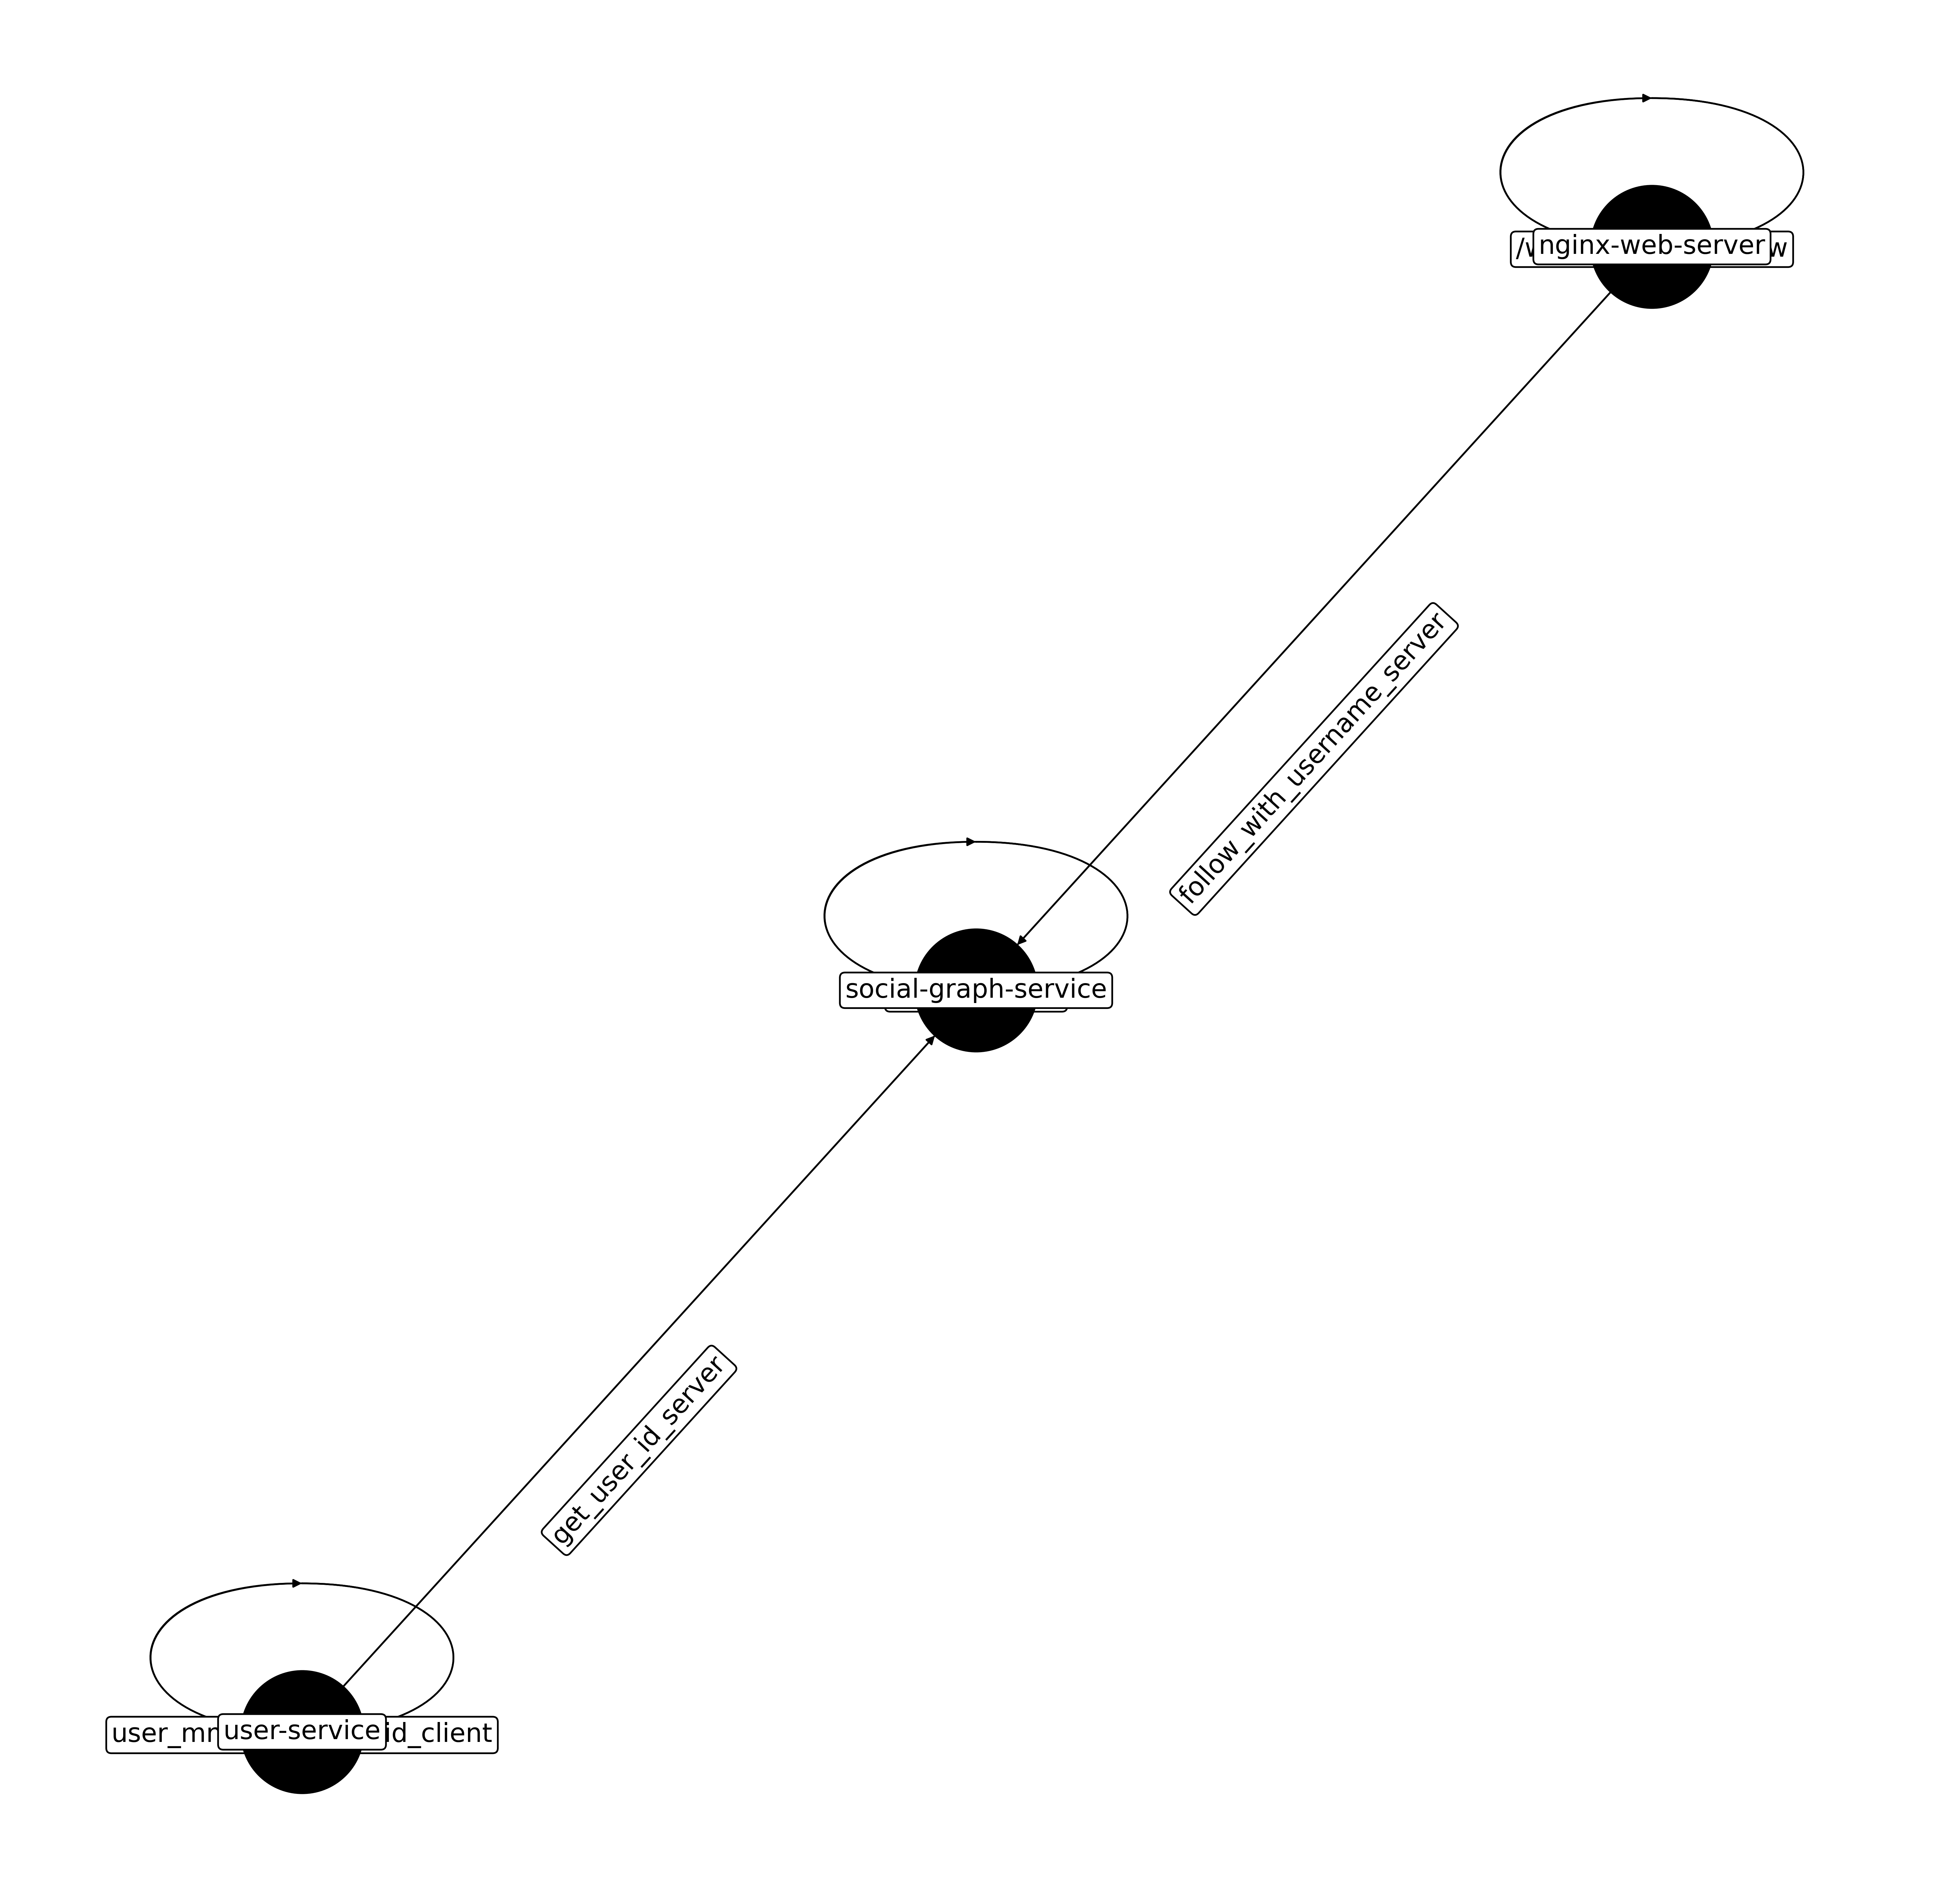


reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-20/user-service.json
tail: al-network.svc.cluster.local:8080/wrk2-api/user/follow"},{"key":"http.host","type":"string","value":
reading failed:  Expecting value: line 1 column 46001868 (char 46001867)

reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-20/user-timeline-service.json
tail: ags":[{"key":"internal.span.format","type":"string","value":"proto"}],"logs":[],"processID":"p2","wa
reading failed:  Unterminated string starting at: line 1 column 87109004 (char 87109003)


In [ ]:
success = 0
for elem in onlyfiles:
    print()
    print("reading " + mypath + "/" + elem)
    file = open( mypath + "/" + elem,'r')  
    lines = file.read()   
    print("tail: "+lines[-100:])
    try:
        inspect_trace(mypath+ "/" + elem)
        success +=1
    except Exception as e:
        print("reading failed: ", e)

In [ ]:
print("Sample 20 files successfully read: " + str(success) + "/" + str(len(onlyfiles)))

Sample 20 files successfully read: 1/7


In [ ]:
mypath= os.getcwd() + '/social-network/sample-rate-50' 
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles

['user-timeline-service.json',
 'post-storage-service.json',
 'jaeger-query.json',
 'nginx-web-server.json',
 'user-service.json',
 'social-graph-service.json',
 'metadata.txt']

'nginx-web-server.json' seems to not be corrupted, however the reading still fails.

In [ ]:
success = 0
for elem in onlyfiles:
    print()
    print("reading " + mypath + "/" + elem)
    file = open( mypath + "/" + elem,'r')  
    lines = file.read()   
    print("tail: "+lines[-100:])
    try:
        inspect_trace(mypath+ "/" + elem)
        success +=1
    except Exception as e:
        print("reading failed: ", e)


reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-50/user-timeline-service.json
tail: internal.span.format","type":"string","value":"proto"}],"logs":[],"processID":"p1","warnings":null},
reading failed:  Expecting value: line 1 column 86515526 (char 86515525)

reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-50/post-storage-service.json
tail: 80849555000,"duration":803,"tags":[{"key":"sampler.type","type":"string","value":"probabilistic"},{"
reading failed:  Unterminated string starting at: line 1 column 91237473 (char 91237472)

reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-50/jaeger-query.json
tail: e":"string","value":"Go-2.30.0"}]}},"warnings":null}],"total":0,"limit":0,"offset":0,"errors":null}

The number of traces is:  2
reading failed:  the null graph has no paths, thus there is no averageshortest path length

reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-50/nginx-w

<Figure size 8000x8000 with 0 Axes>

In [ ]:
print("Sample 50 files successfully read: " + str(success) + "/" + str(len(onlyfiles)))

Sample 50 files successfully read: 0/7


In [ ]:
mypath= os.getcwd() + '/social-network/sample-rate-100' 
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles

['user-timeline-service.json',
 'post-storage-service.json',
 'nginx-web-server.json',
 'user-service.json',
 'social-graph-service.json',
 'metadata.txt']

the files seem to be not corrupted however, the reading still fails

In [ ]:
success = 0
for elem in onlyfiles:
    print()
    print("reading " + mypath + "/" + elem)
    file = open( mypath + "/" + elem,'r')  
    lines = file.read()   
    print("tail: "+lines[-100:])
    try:
        inspect_trace(mypath+ "/" + elem)
        success +=1
    except Exception as e:
        print("reading failed: ", e)


reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-100/user-timeline-service.json
tail: e":"string","value":"C++-0.4.2"}]}},"warnings":null}],"total":0,"limit":0,"offset":0,"errors":null}

The number of traces is:  20000
reading failed:  '1f1ea3505d81810c'

reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-100/post-storage-service.json
tail: e":"string","value":"C++-0.4.2"}]}},"warnings":null}],"total":0,"limit":0,"offset":0,"errors":null}

The number of traces is:  20000
reading failed:  '1f1ea3505d81810c'

reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-100/nginx-web-server.json
tail: e":"string","value":"C++-0.4.2"}]}},"warnings":null}],"total":0,"limit":0,"offset":0,"errors":null}

The number of traces is:  20000
reading failed:  '1f1ea3505d81810c'

reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-100/user-service.json
tail: e":"string","value":"C++-0.4.2"}]}},"warnings":null}

<Figure size 8000x8000 with 0 Axes>

In [ ]:
print("Sample 100 files successfully read: " + str(success) + "/" + str(len(onlyfiles)))

Sample 100 files successfully read: 0/6


In [ ]:
# path = os.getcwd() + '/social-network/sample-rate-100/post-storage-service.json' 
# print()
# print("reading " + path)
# file = open( path,'r')  
# lines = file.read()   
# print("tail: "+lines[-100:])
# inspect_trace(path)


The error was caused by a span ID of a tail node that was in someway missing.
Moreover it is not possible to compute statistics such as diameter since in this case the graph is not connected.

In [ ]:
def inspect_trace_v2(path):
    import json
    
    import networkx as nx
    import matplotlib.pyplot as plt
    from statistics import mean, stdev
    # Opening JSON file
    f = open(path)

    # returns JSON object as 
    # a dictionary
    data = json.load(f)

    # Closing file
    f.close()
    content = data['data']
    n_traces = len(content)
    print("The number of traces is: ",n_traces)
    avg_shortest_paths = []
    avg_clustering = []
    diameters = []
    avg_entities = []
    avg_relations = []
    for elem in content:
        first = elem
        second = first['spans']

        triplets = [] #head, link, tail ---> process(spanID), operationName, process(references_spanID)

        dict_span_process = {}
        for elem in second:
            dict_span_process[elem['spanID']] = first['processes'][elem['processID']]['serviceName']

        root = first['traceID']

        for elem in second:
            head = elem['spanID']
            link = elem['operationName']
            tail = None
            if head != root:
                tail = elem['references'][0]['spanID']
                # added to fix the weird error
                try:
                    triplets.append([dict_span_process[head],link,dict_span_process[tail]])
                except:
                    triplets.append([dict_span_process[head],link,tail])

        # Create a graph object
        G = nx.Graph()

        services_set= set() #entities set
        operations_set = set() #relations set
        for triplet in triplets:
            services_set.add(triplet[0])
            services_set.add(triplet[2])
            operations_set.add(triplet[1])
        labelsDict = {}
        for elem in services_set:
            G.add_node(elem)
            labelsDict[elem] = elem
        for triplet in triplets:
            G.add_edge(triplet[0], triplet[2], label=triplet[1])

        node_size = 5000
        font_size = 15
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2')
        fig = plt.figure(1, figsize=(20, 20), dpi=400)
        # Use NetworkX's built-in drawing function to visualize the graph
        # nx.draw(G)
        pos = nx.spring_layout(G,seed = 545)

        # removed for graph not connected
        # avg_shortest_paths.append(nx.average_shortest_path_length(G))
        # avg_clustering.append(nx.average_clustering(G))
        # diameters.append(nx.diameter(G))
        avg_entities.append(len(services_set))
        avg_relations.append(len(operations_set))
        
        
    first = content[0]
    second = first['spans']

    triplets = [] #head, link, tail ---> process(spanID), operationName, process(references_spanID)
    
    dict_span_process = {}
    for elem in second:
        dict_span_process[elem['spanID']] = first['processes'][elem['processID']]['serviceName']

    root = first['traceID']

    for elem in second:
        head = elem['spanID']
        link = elem['operationName']
        tail = None
        if head != root:
            tail = elem['references'][0]['spanID']
            # added to fix the weird error
            try:
                triplets.append([dict_span_process[head],link,dict_span_process[tail]])
            except:
                triplets.append([dict_span_process[head],link,tail])
        


    # Create a graph object
    G = nx.Graph()
    
    services_set= set() #entities set
    operations_set = set() #relations set
    for triplet in triplets:
        services_set.add(triplet[0])
        services_set.add(triplet[2])
        operations_set.add(triplet[1])
    labelsDict = {}
    for elem in services_set:
        G.add_node(elem)
        labelsDict[elem] = elem
    for triplet in triplets:
        G.add_edge(triplet[0], triplet[2], label=triplet[1])

    node_size = 5000
    font_size = 15
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2')
    fig = plt.figure(1, figsize=(20, 20), dpi=400)
    # Use NetworkX's built-in drawing function to visualize the graph
    # nx.draw(G)
    pos = nx.spring_layout(G,seed = 545)
    
    print("Computing statistics")
    # removed for graph not connected
    # print("The mean average shortest path lenght is: ",mean(avg_shortest_paths), " ,standard deviation: ", stdev(avg_shortest_paths))
    # print("The mean average clustering coefficient is: ",mean(avg_clustering) , " ,standard deviation: ", stdev(avg_clustering))
    # print("The mean diameter is: ", mean(diameters) , " ,standard deviation: ", stdev(diameters))
    print("The mean number of entities is: ", mean(avg_entities), " ,standard deviation: ", stdev(avg_entities))
    print("The mean number of relations is: ", mean(avg_relations), " ,standard deviation: ", stdev(avg_relations))
    print("This is an example of this trace")
    nx.draw_networkx_edges(G,pos,arrowstyle="-|>",arrowsize=10,width=1,arrows=True,node_size=node_size)
#     nx.draw_networkx_nodes(G,pos,node_size = node_size,labels=labelsDict, with_labels = True)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'label'),font_size = font_size,bbox = bbox,
                                verticalalignment = 'center_baseline')

    nx.draw(G,pos, labels=labelsDict, with_labels = True,node_size=node_size,font_size = font_size,bbox = bbox,node_color='k')

    # Import matplotlib library to show the graph
    plt.show()


In [ ]:
import os
from os import listdir
from os.path import isfile, join
mypath= os.getcwd() + '/social-network/sample-rate-20' 
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles

['jaeger-query.json',
 'metadata.txt',
 'nginx-web-server.json',
 'post-storage-service.json',
 'social-graph-service.json',
 'user-service.json',
 'user-timeline-service.json']

'jaeger-query.json', and 'metadata.txt' are not traces

the only json file read finishes with "total":0,"limit":0,"offset":0,"errors":null}
the others seem to be cut off


reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-20/jaeger-query.json
tail: e":"string","value":"Go-2.30.0"}]}},"warnings":null}],"total":0,"limit":0,"offset":0,"errors":null}

The number of traces is:  63
Computing statistics
The mean number of entities is:  0  ,standard deviation:  0.0
The mean number of relations is:  0  ,standard deviation:  0.0
This is an example of this trace


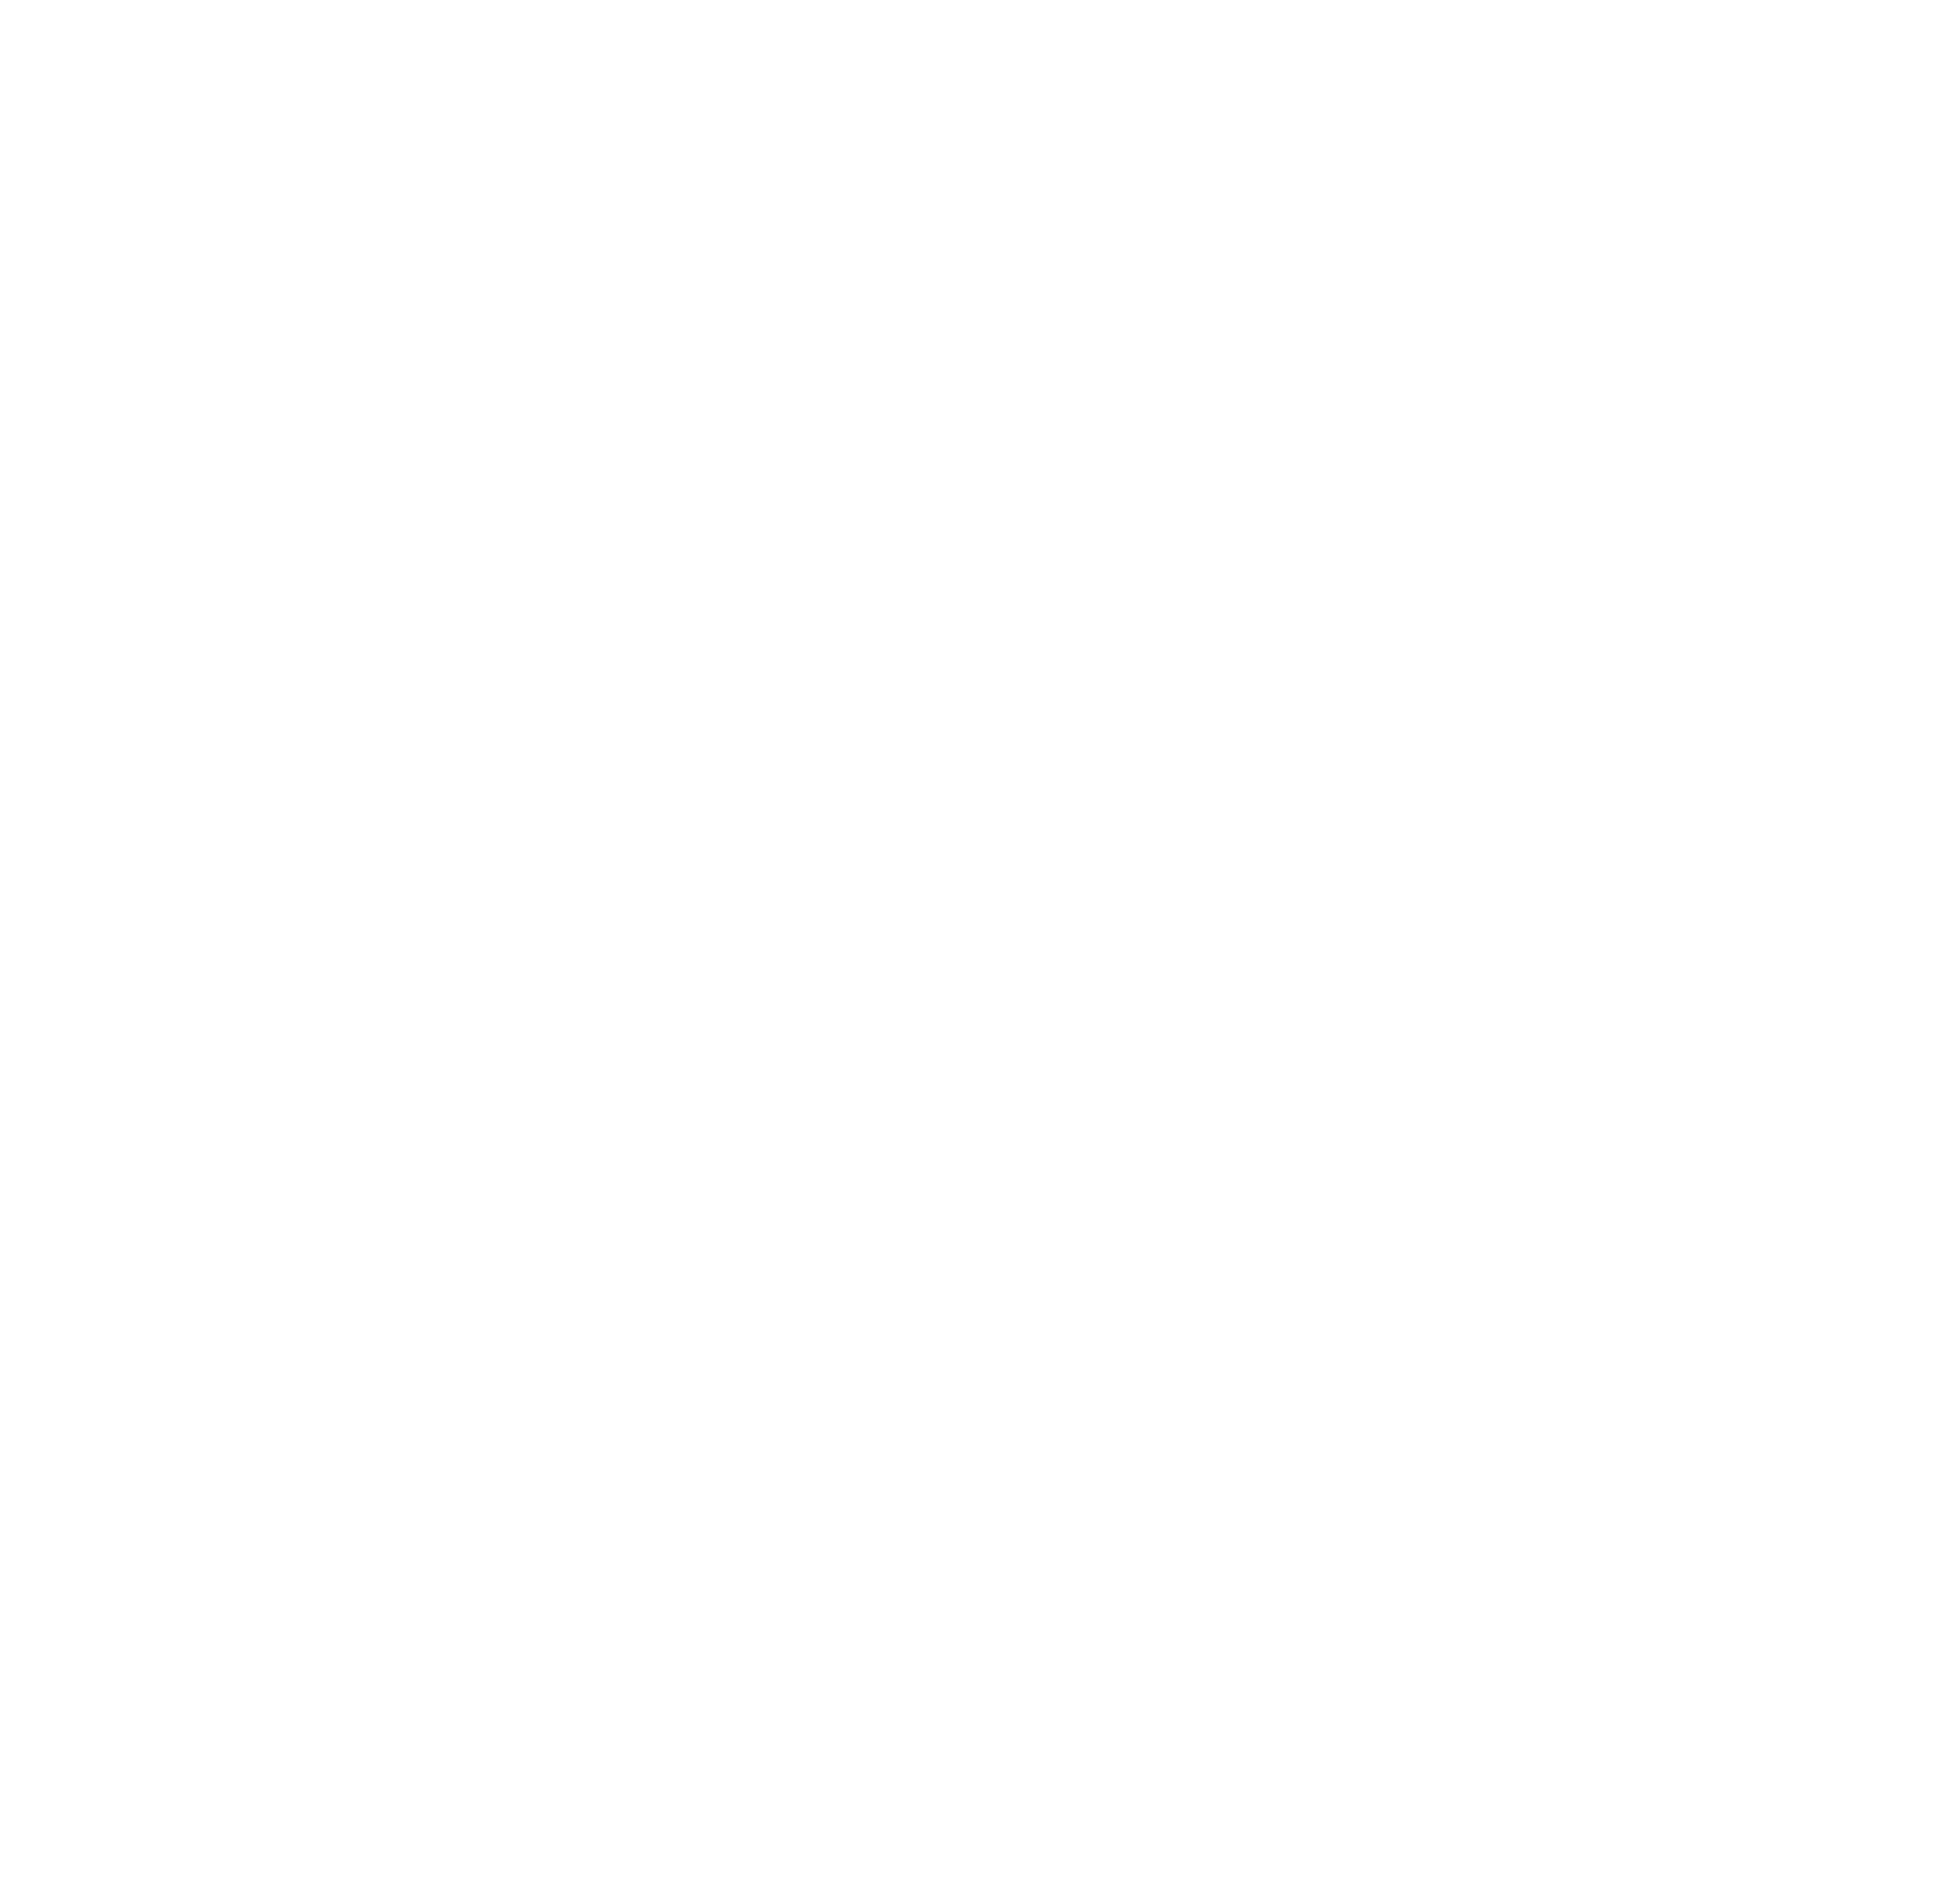


reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-20/metadata.txt
tail: Benchmark: Social Network
Sampling rate: .20
Request rate: 2000 reqs/sec
Duration: 30mins
reading failed:  Expecting value: line 1 column 1 (char 0)

reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-20/nginx-web-server.json
tail: 9f36698167d","flags":1,"operationName":"post_storage_read_posts_server","references":[{"refType":"CH
reading failed:  Unterminated string starting at: line 1 column 87400300 (char 87400299)

reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-20/post-storage-service.json
tail: 978d95-tx7l5"},{"key":"ip","type":"string","value":"127.0.0.1"},{"key":"jaeger.version","type":"stri
reading failed:  Unterminated string starting at: line 1 column 86068615 (char 86068614)

reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-20/social-graph-service.json
tail: e":"string","value":"C++-0.4.2"}]}},"war

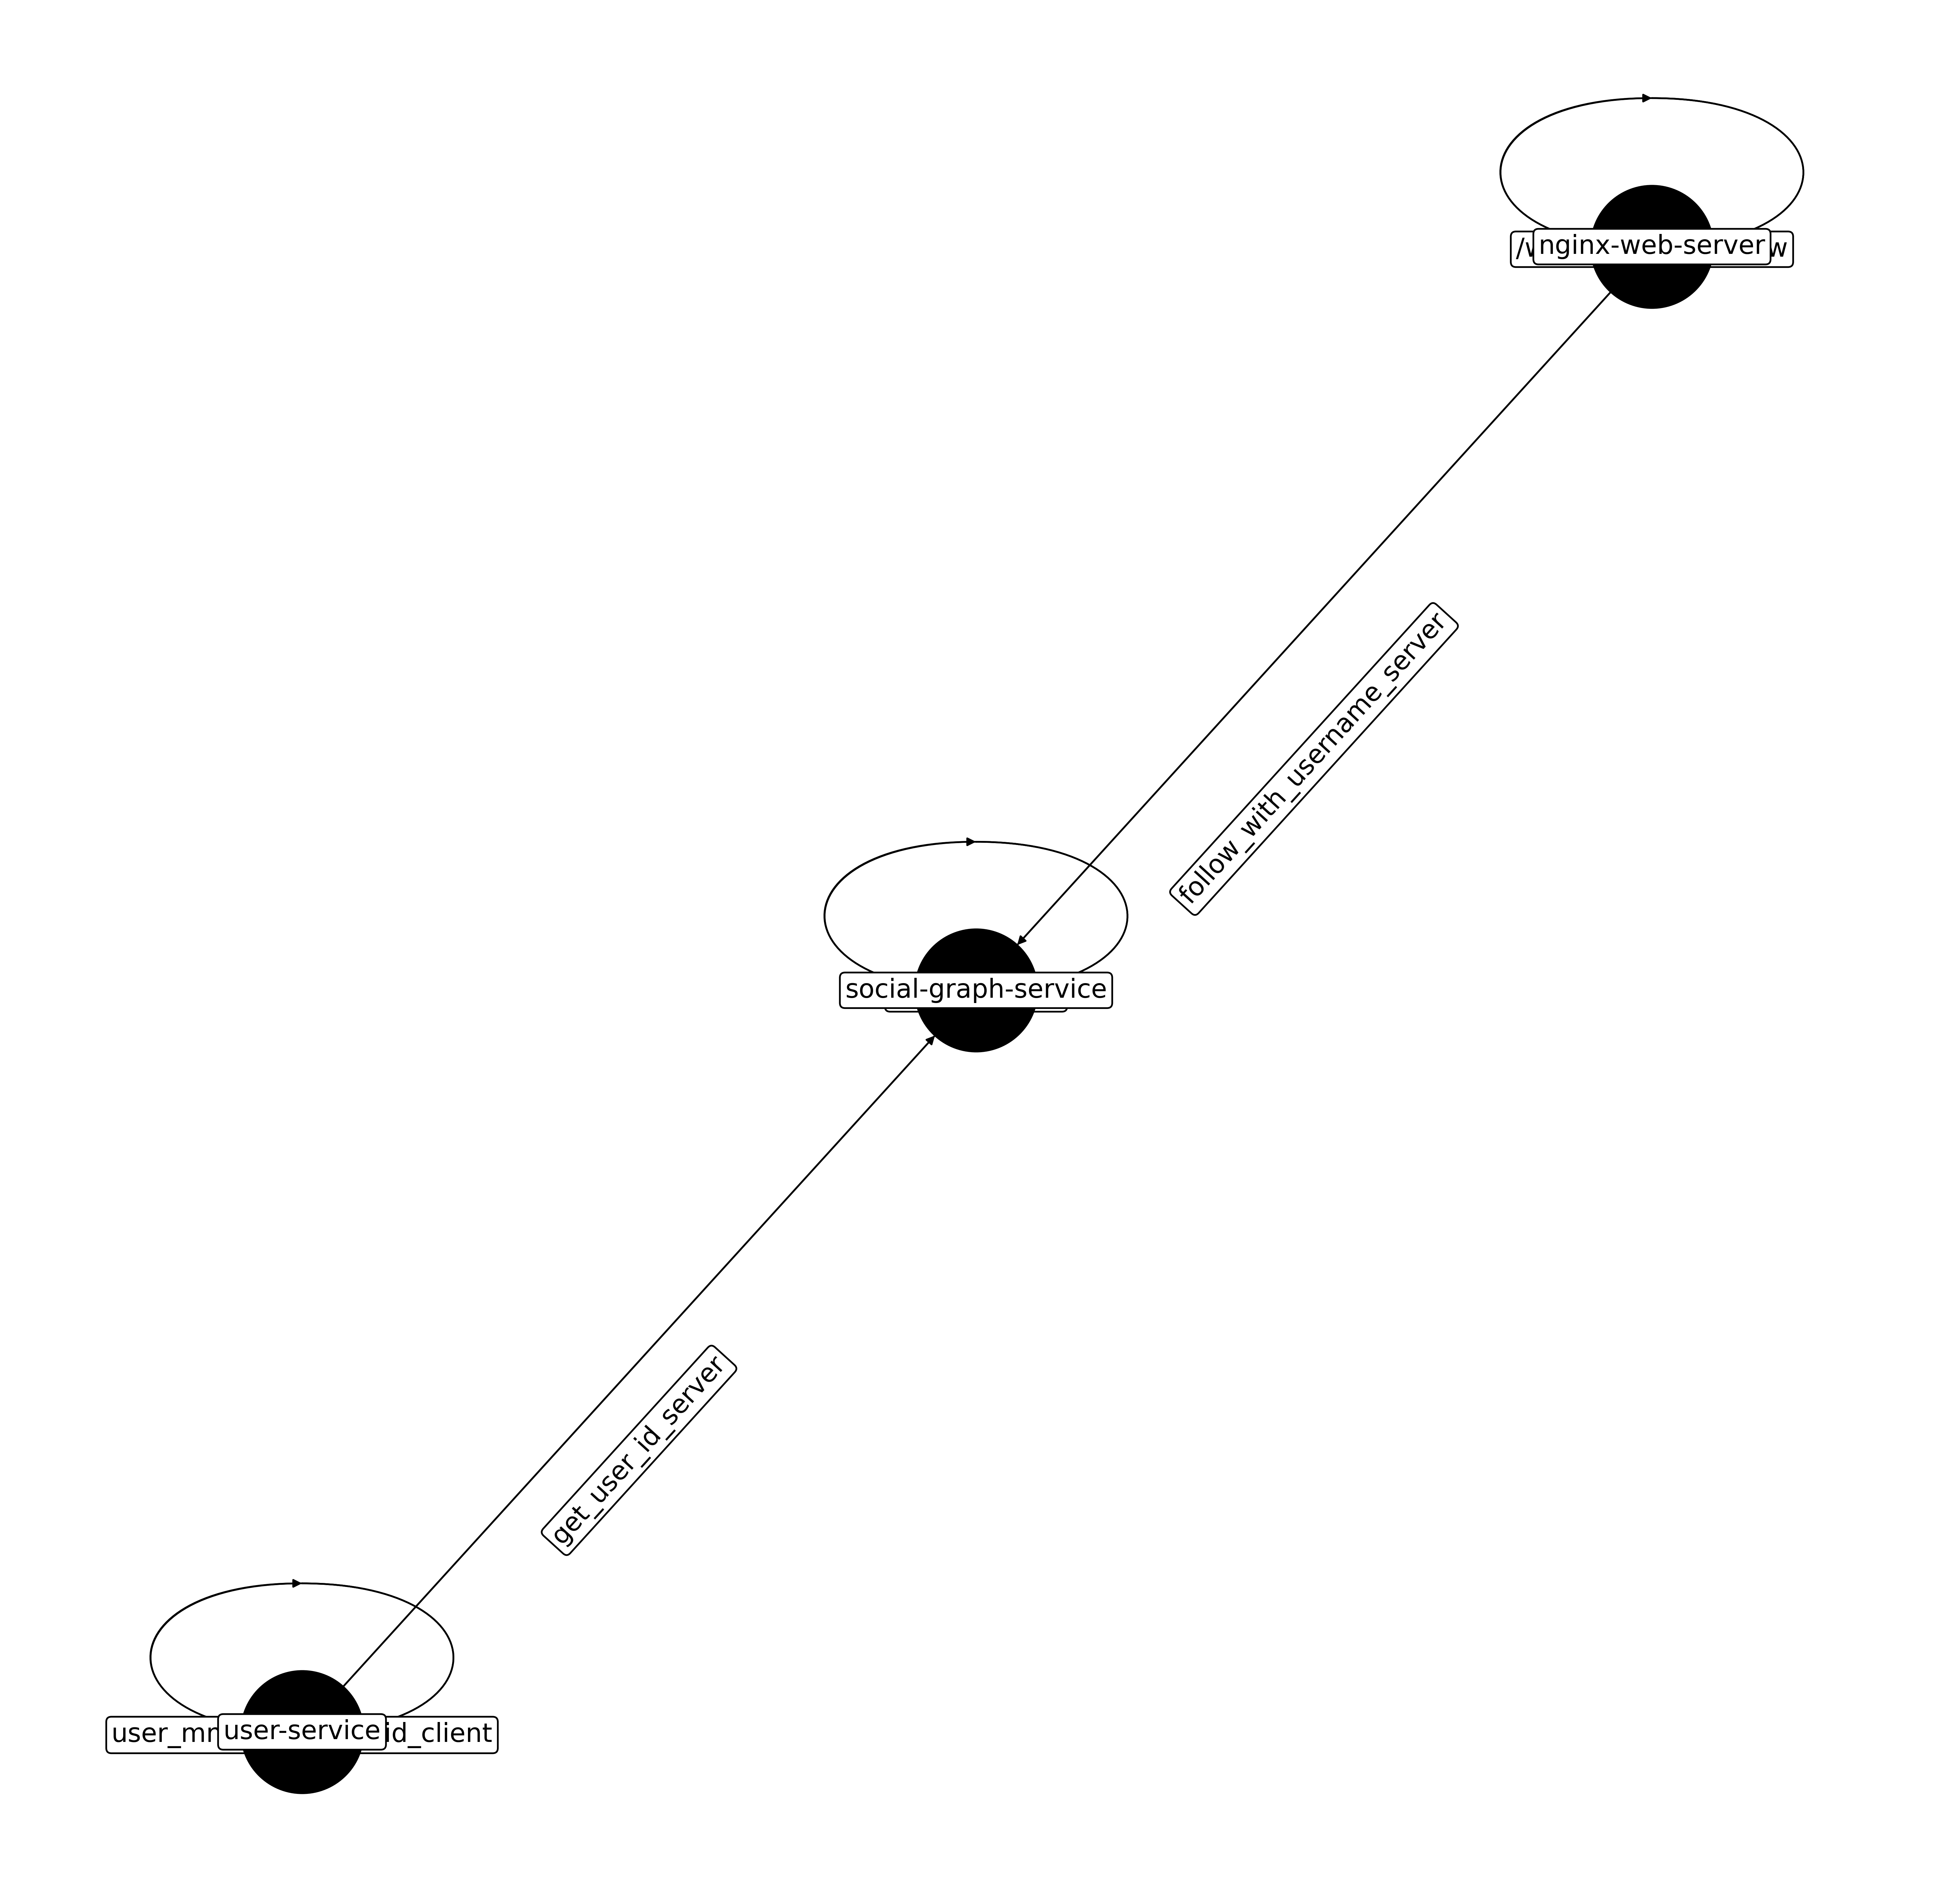


reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-20/user-service.json
tail: al-network.svc.cluster.local:8080/wrk2-api/user/follow"},{"key":"http.host","type":"string","value":
reading failed:  Expecting value: line 1 column 46001868 (char 46001867)

reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-20/user-timeline-service.json
tail: ags":[{"key":"internal.span.format","type":"string","value":"proto"}],"logs":[],"processID":"p2","wa
reading failed:  Unterminated string starting at: line 1 column 87109004 (char 87109003)


In [ ]:
success = 0
for elem in onlyfiles:
    print()
    print("reading " + mypath + "/" + elem)
    file = open( mypath + "/" + elem,'r')  
    lines = file.read()   
    print("tail: "+lines[-100:])
    try:
        inspect_trace_v2(mypath+ "/" + elem)
        success +=1
    except Exception as e:
        print("reading failed: ", e)

In [ ]:
print("Sample 20 files successfully read: " + str(success) + "/" + str(len(onlyfiles)))

Sample 20 files successfully read: 2/7


In [ ]:
mypath= os.getcwd() + '/social-network/sample-rate-50' 
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles

['user-timeline-service.json',
 'post-storage-service.json',
 'jaeger-query.json',
 'nginx-web-server.json',
 'user-service.json',
 'social-graph-service.json',
 'metadata.txt']

'nginx-web-server.json' seems to not be corrupted, in this case the reading does not fails. There is also a small standard deviation in the number of nodes. Maybe a trace is just corrupted.


reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-50/user-timeline-service.json
tail: internal.span.format","type":"string","value":"proto"}],"logs":[],"processID":"p1","warnings":null},
reading failed:  Expecting value: line 1 column 86515526 (char 86515525)

reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-50/post-storage-service.json
tail: 80849555000,"duration":803,"tags":[{"key":"sampler.type","type":"string","value":"probabilistic"},{"
reading failed:  Unterminated string starting at: line 1 column 91237473 (char 91237472)

reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-50/jaeger-query.json
tail: e":"string","value":"Go-2.30.0"}]}},"warnings":null}],"total":0,"limit":0,"offset":0,"errors":null}

The number of traces is:  2
Computing statistics
The mean number of entities is:  0  ,standard deviation:  0.0
The mean number of relations is:  0  ,standard deviation:  0.0
This is an example of this trace

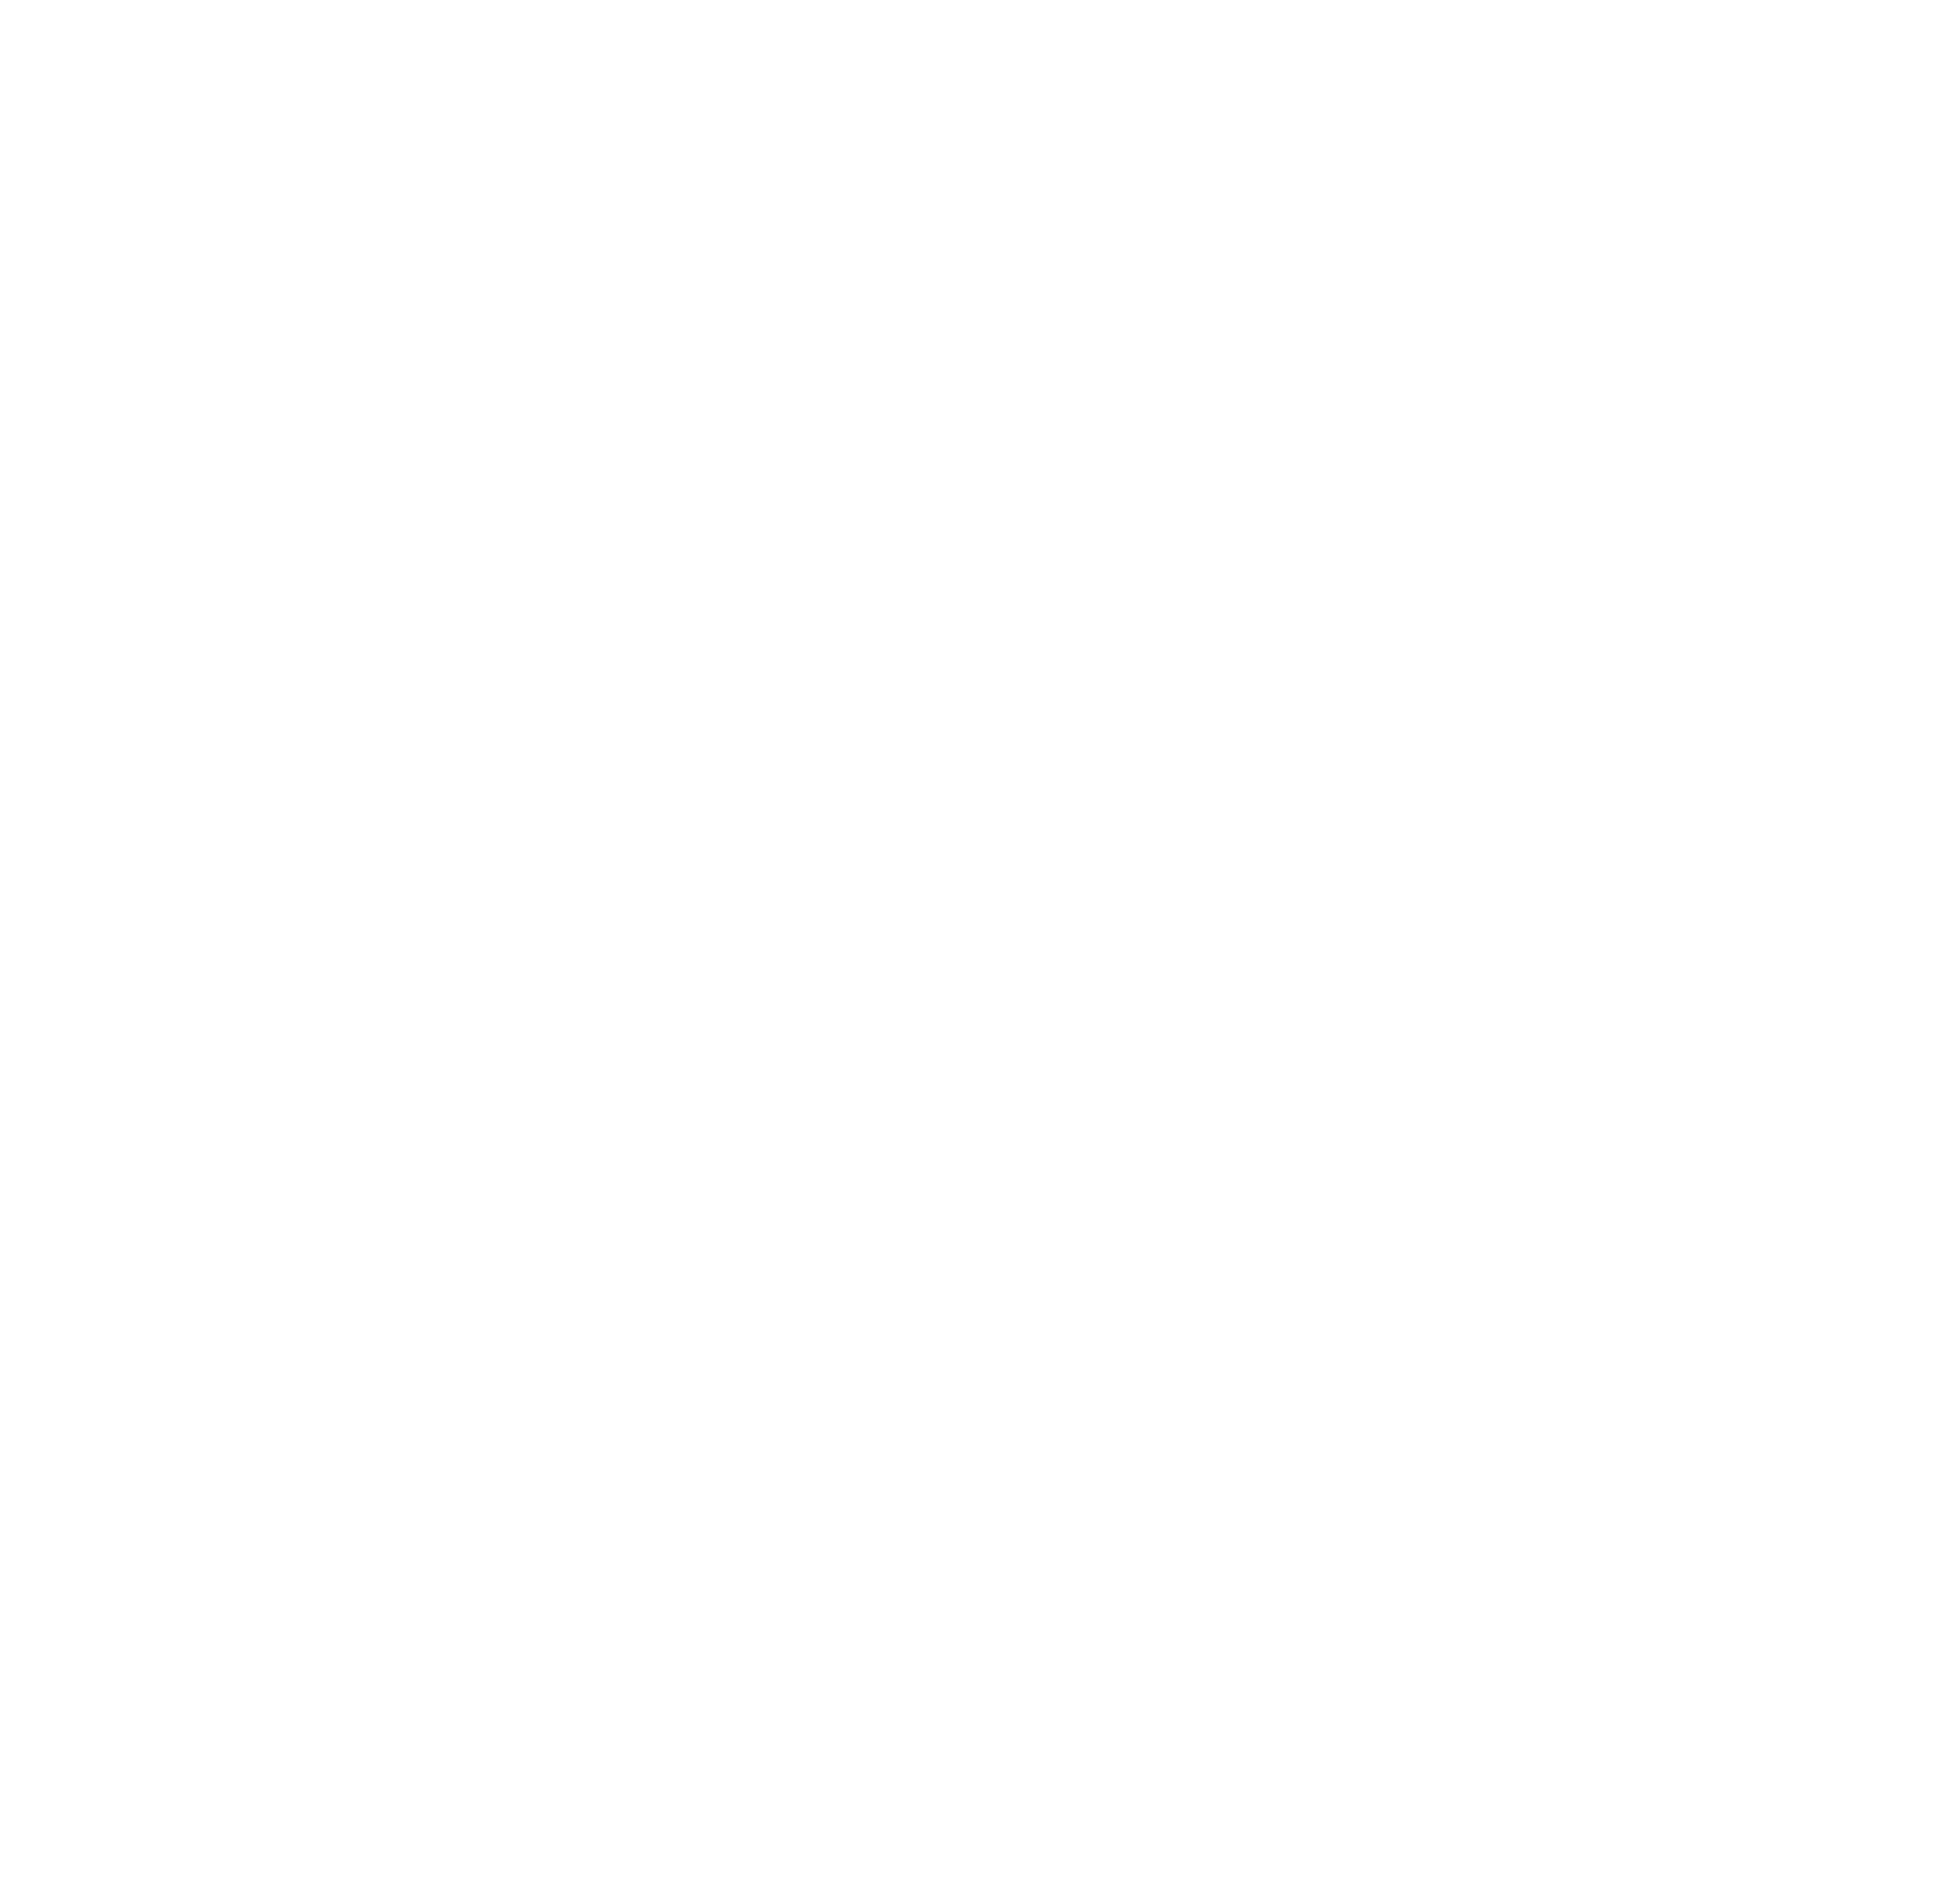


reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-50/nginx-web-server.json
tail: e":"string","value":"C++-0.4.2"}]}},"warnings":null}],"total":0,"limit":0,"offset":0,"errors":null}

The number of traces is:  20000
Computing statistics
The mean number of entities is:  3.0011  ,standard deviation:  0.03314883017916488
The mean number of relations is:  5.9989  ,standard deviation:  0.03314883017916488
This is an example of this trace


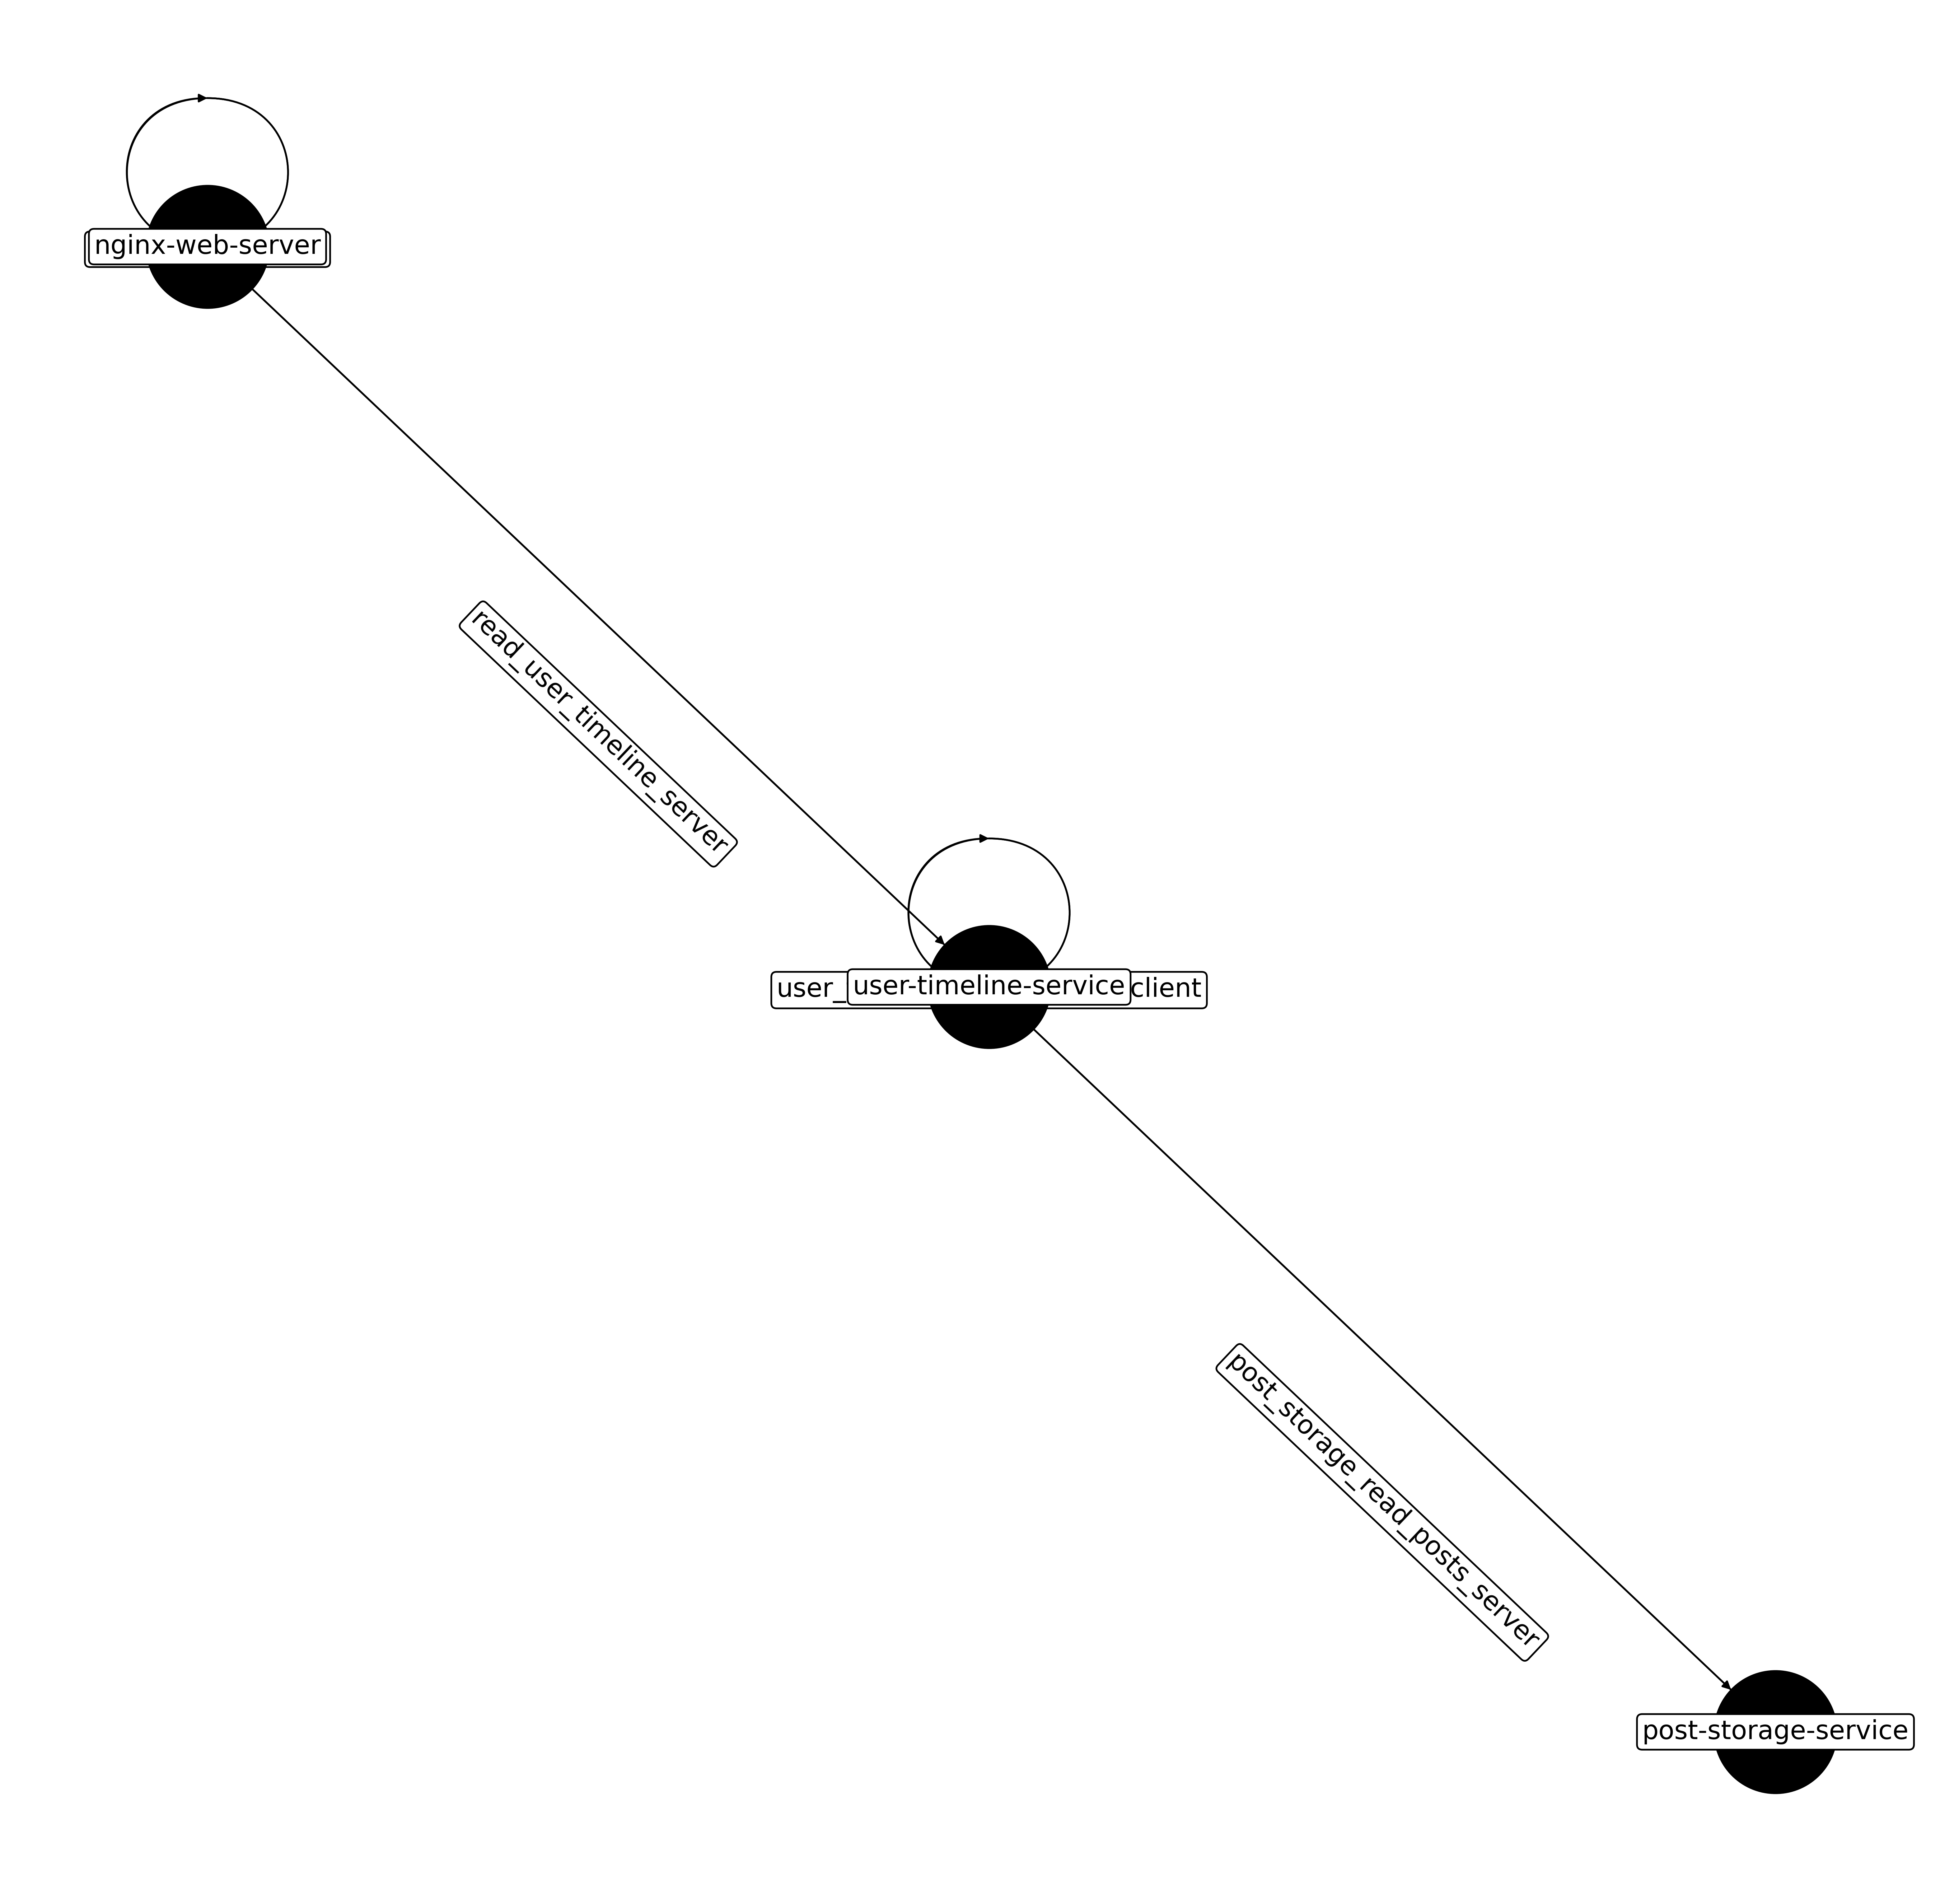


reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-50/user-service.json
tail: 9"}],"startTime":1675878903670470,"duration":314,"tags":[{"key":"internal.span.format","type":"strin
reading failed:  Unterminated string starting at: line 1 column 113384782 (char 113384781)

reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-50/social-graph-service.json
tail: onName":"get_user_id_server","references":[{"refType":"CHILD_OF","traceID":"37fab9792b84ea6a","spanI
reading failed:  Unterminated string starting at: line 1 column 115527620 (char 115527619)

reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-50/metadata.txt
tail: Benchmark: social-network
Sampling rate: .5
Request rate: 2000 reqs/sec
Duration: 30mins
reading failed:  Expecting value: line 1 column 1 (char 0)


In [ ]:
success = 0
for elem in onlyfiles:
    print()
    print("reading " + mypath + "/" + elem)
    file = open( mypath + "/" + elem,'r')  
    lines = file.read()   
    print("tail: "+lines[-100:])
    try:
        inspect_trace_v2(mypath+ "/" + elem)
        success +=1
    except Exception as e:
        print("reading failed: ", e)

In [ ]:
print("Sample 50 files successfully read: " + str(success) + "/" + str(len(onlyfiles)))

Sample 50 files successfully read: 2/7


In [ ]:
mypath= os.getcwd() + '/social-network/sample-rate-100' 
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles

['user-timeline-service.json',
 'post-storage-service.json',
 'nginx-web-server.json',
 'user-service.json',
 'social-graph-service.json',
 'metadata.txt']

the files seem to be not corrupted however, in this case the reading does not fails. There is also a small standard deviation in the number of nodes. Maybe a trace is just corrupted.

In [ ]:
success = 0
for elem in onlyfiles:
    print()
    print("reading " + mypath + "/" + elem)
    file = open( mypath + "/" + elem,'r')  
    lines = file.read()   
    print("tail: "+lines[-100:])
    try:
        inspect_trace_v2(mypath+ "/" + elem)
        success +=1
    except Exception as e:
        print("reading failed: ", e)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print("Sample 100 files successfully read: " + str(success) + "/" + str(len(onlyfiles)))

Sample 100 files successfully read: 5/6


now I will try to remove the corrupted traces


In [ ]:
def inspect_trace_v3(path):
    import json
    
    import networkx as nx
    import matplotlib.pyplot as plt
    from statistics import mean, stdev
    # Opening JSON file
    f = open(path)

    # returns JSON object as 
    # a dictionary
    data = json.load(f)

    # Closing file
    f.close()
    content = data['data']
    n_traces = len(content)
    print("The number of traces is: ",n_traces)
    avg_shortest_paths = []
    avg_clustering = []
    diameters = []
    avg_entities = []
    avg_relations = []
    for elem in content:
        first = elem
        second = first['spans']

        triplets = [] #head, link, tail ---> process(spanID), operationName, process(references_spanID)

        dict_span_process = {}
        for elem in second:
            dict_span_process[elem['spanID']] = first['processes'][elem['processID']]['serviceName']

        root = first['traceID']


        #added to skip the corrupted trace
        try:
          for elem in second:
              head = elem['spanID']
              link = elem['operationName']
              tail = None
              if head != root:
                  tail = elem['references'][0]['spanID']
                  triplets.append([dict_span_process[head],link,dict_span_process[tail]])
        except:
          continue

        # Create a graph object
        G = nx.Graph()

        services_set= set() #entities set
        operations_set = set() #relations set
        for triplet in triplets:
            services_set.add(triplet[0])
            services_set.add(triplet[2])
            operations_set.add(triplet[1])
        labelsDict = {}
        for elem in services_set:
            G.add_node(elem)
            labelsDict[elem] = elem
        for triplet in triplets:
            G.add_edge(triplet[0], triplet[2], label=triplet[1])

        node_size = 5000
        font_size = 15
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2')
        fig = plt.figure(1, figsize=(20, 20), dpi=400)
        # Use NetworkX's built-in drawing function to visualize the graph
        # nx.draw(G)
        pos = nx.spring_layout(G,seed = 545)

        avg_shortest_paths.append(nx.average_shortest_path_length(G))
        avg_clustering.append(nx.average_clustering(G))
        diameters.append(nx.diameter(G))
        avg_entities.append(len(services_set))
        avg_relations.append(len(operations_set))
        
        
    first = content[0]
    second = first['spans']

    triplets = [] #head, link, tail ---> process(spanID), operationName, process(references_spanID)
    
    dict_span_process = {}
    for elem in second:
        dict_span_process[elem['spanID']] = first['processes'][elem['processID']]['serviceName']

    root = first['traceID']

    #added to skip the corrupted trace
    for elem in second:
        head = elem['spanID']
        link = elem['operationName']
        tail = None
        if head != root:
          tail = elem['references'][0]['spanID']
          triplets.append([dict_span_process[head],link,dict_span_process[tail]])

        


    # Create a graph object
    G = nx.Graph()
    
    services_set= set() #entities set
    operations_set = set() #relations set
    for triplet in triplets:
        services_set.add(triplet[0])
        services_set.add(triplet[2])
        operations_set.add(triplet[1])
    labelsDict = {}
    for elem in services_set:
        G.add_node(elem)
        labelsDict[elem] = elem
    for triplet in triplets:
        G.add_edge(triplet[0], triplet[2], label=triplet[1])

    node_size = 5000
    font_size = 15
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2')
    fig = plt.figure(1, figsize=(20, 20), dpi=400)
    # Use NetworkX's built-in drawing function to visualize the graph
    # nx.draw(G)
    pos = nx.spring_layout(G,seed = 545)
    
    print("Computing statistics")
    print("The mean average shortest path lenght is: ",mean(avg_shortest_paths), " ,standard deviation: ", stdev(avg_shortest_paths))
    print("The mean average clustering coefficient is: ",mean(avg_clustering) , " ,standard deviation: ", stdev(avg_clustering))
    print("The mean diameter is: ", mean(diameters) , " ,standard deviation: ", stdev(diameters))
    print("The mean number of entities is: ", mean(avg_entities), " ,standard deviation: ", stdev(avg_entities))
    print("The mean number of relations is: ", mean(avg_relations), " ,standard deviation: ", stdev(avg_relations))
    print("Number of traces skipped: ", n_traces - len(avg_relations))
    print("This is an example of this trace")
    nx.draw_networkx_edges(G,pos,arrowstyle="-|>",arrowsize=10,width=1,arrows=True,node_size=node_size)
#     nx.draw_networkx_nodes(G,pos,node_size = node_size,labels=labelsDict, with_labels = True)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'label'),font_size = font_size,bbox = bbox,
                                verticalalignment = 'center_baseline')

    nx.draw(G,pos, labels=labelsDict, with_labels = True,node_size=node_size,font_size = font_size,bbox = bbox,node_color='k')

    # Import matplotlib library to show the graph
    plt.show()


In [ ]:
import os
from os import listdir
from os.path import isfile, join
mypath= os.getcwd() + '/social-network/sample-rate-20' 
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles

['jaeger-query.json',
 'metadata.txt',
 'nginx-web-server.json',
 'post-storage-service.json',
 'social-graph-service.json',
 'user-service.json',
 'user-timeline-service.json']

'jaeger-query.json', and 'metadata.txt' are not traces

the only json file read finishes with "total":0,"limit":0,"offset":0,"errors":null}
the others seem to be cut off


reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-20/jaeger-query.json
tail: e":"string","value":"Go-2.30.0"}]}},"warnings":null}],"total":0,"limit":0,"offset":0,"errors":null}

The number of traces is:  63
reading failed:  the null graph has no paths, thus there is no averageshortest path length

reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-20/metadata.txt
tail: Benchmark: Social Network
Sampling rate: .20
Request rate: 2000 reqs/sec
Duration: 30mins
reading failed:  Expecting value: line 1 column 1 (char 0)

reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-20/nginx-web-server.json
tail: 9f36698167d","flags":1,"operationName":"post_storage_read_posts_server","references":[{"refType":"CH
reading failed:  Unterminated string starting at: line 1 column 87400300 (char 87400299)

reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-20/post-storage-service.json
tail: 978d95-tx7l5"},{"

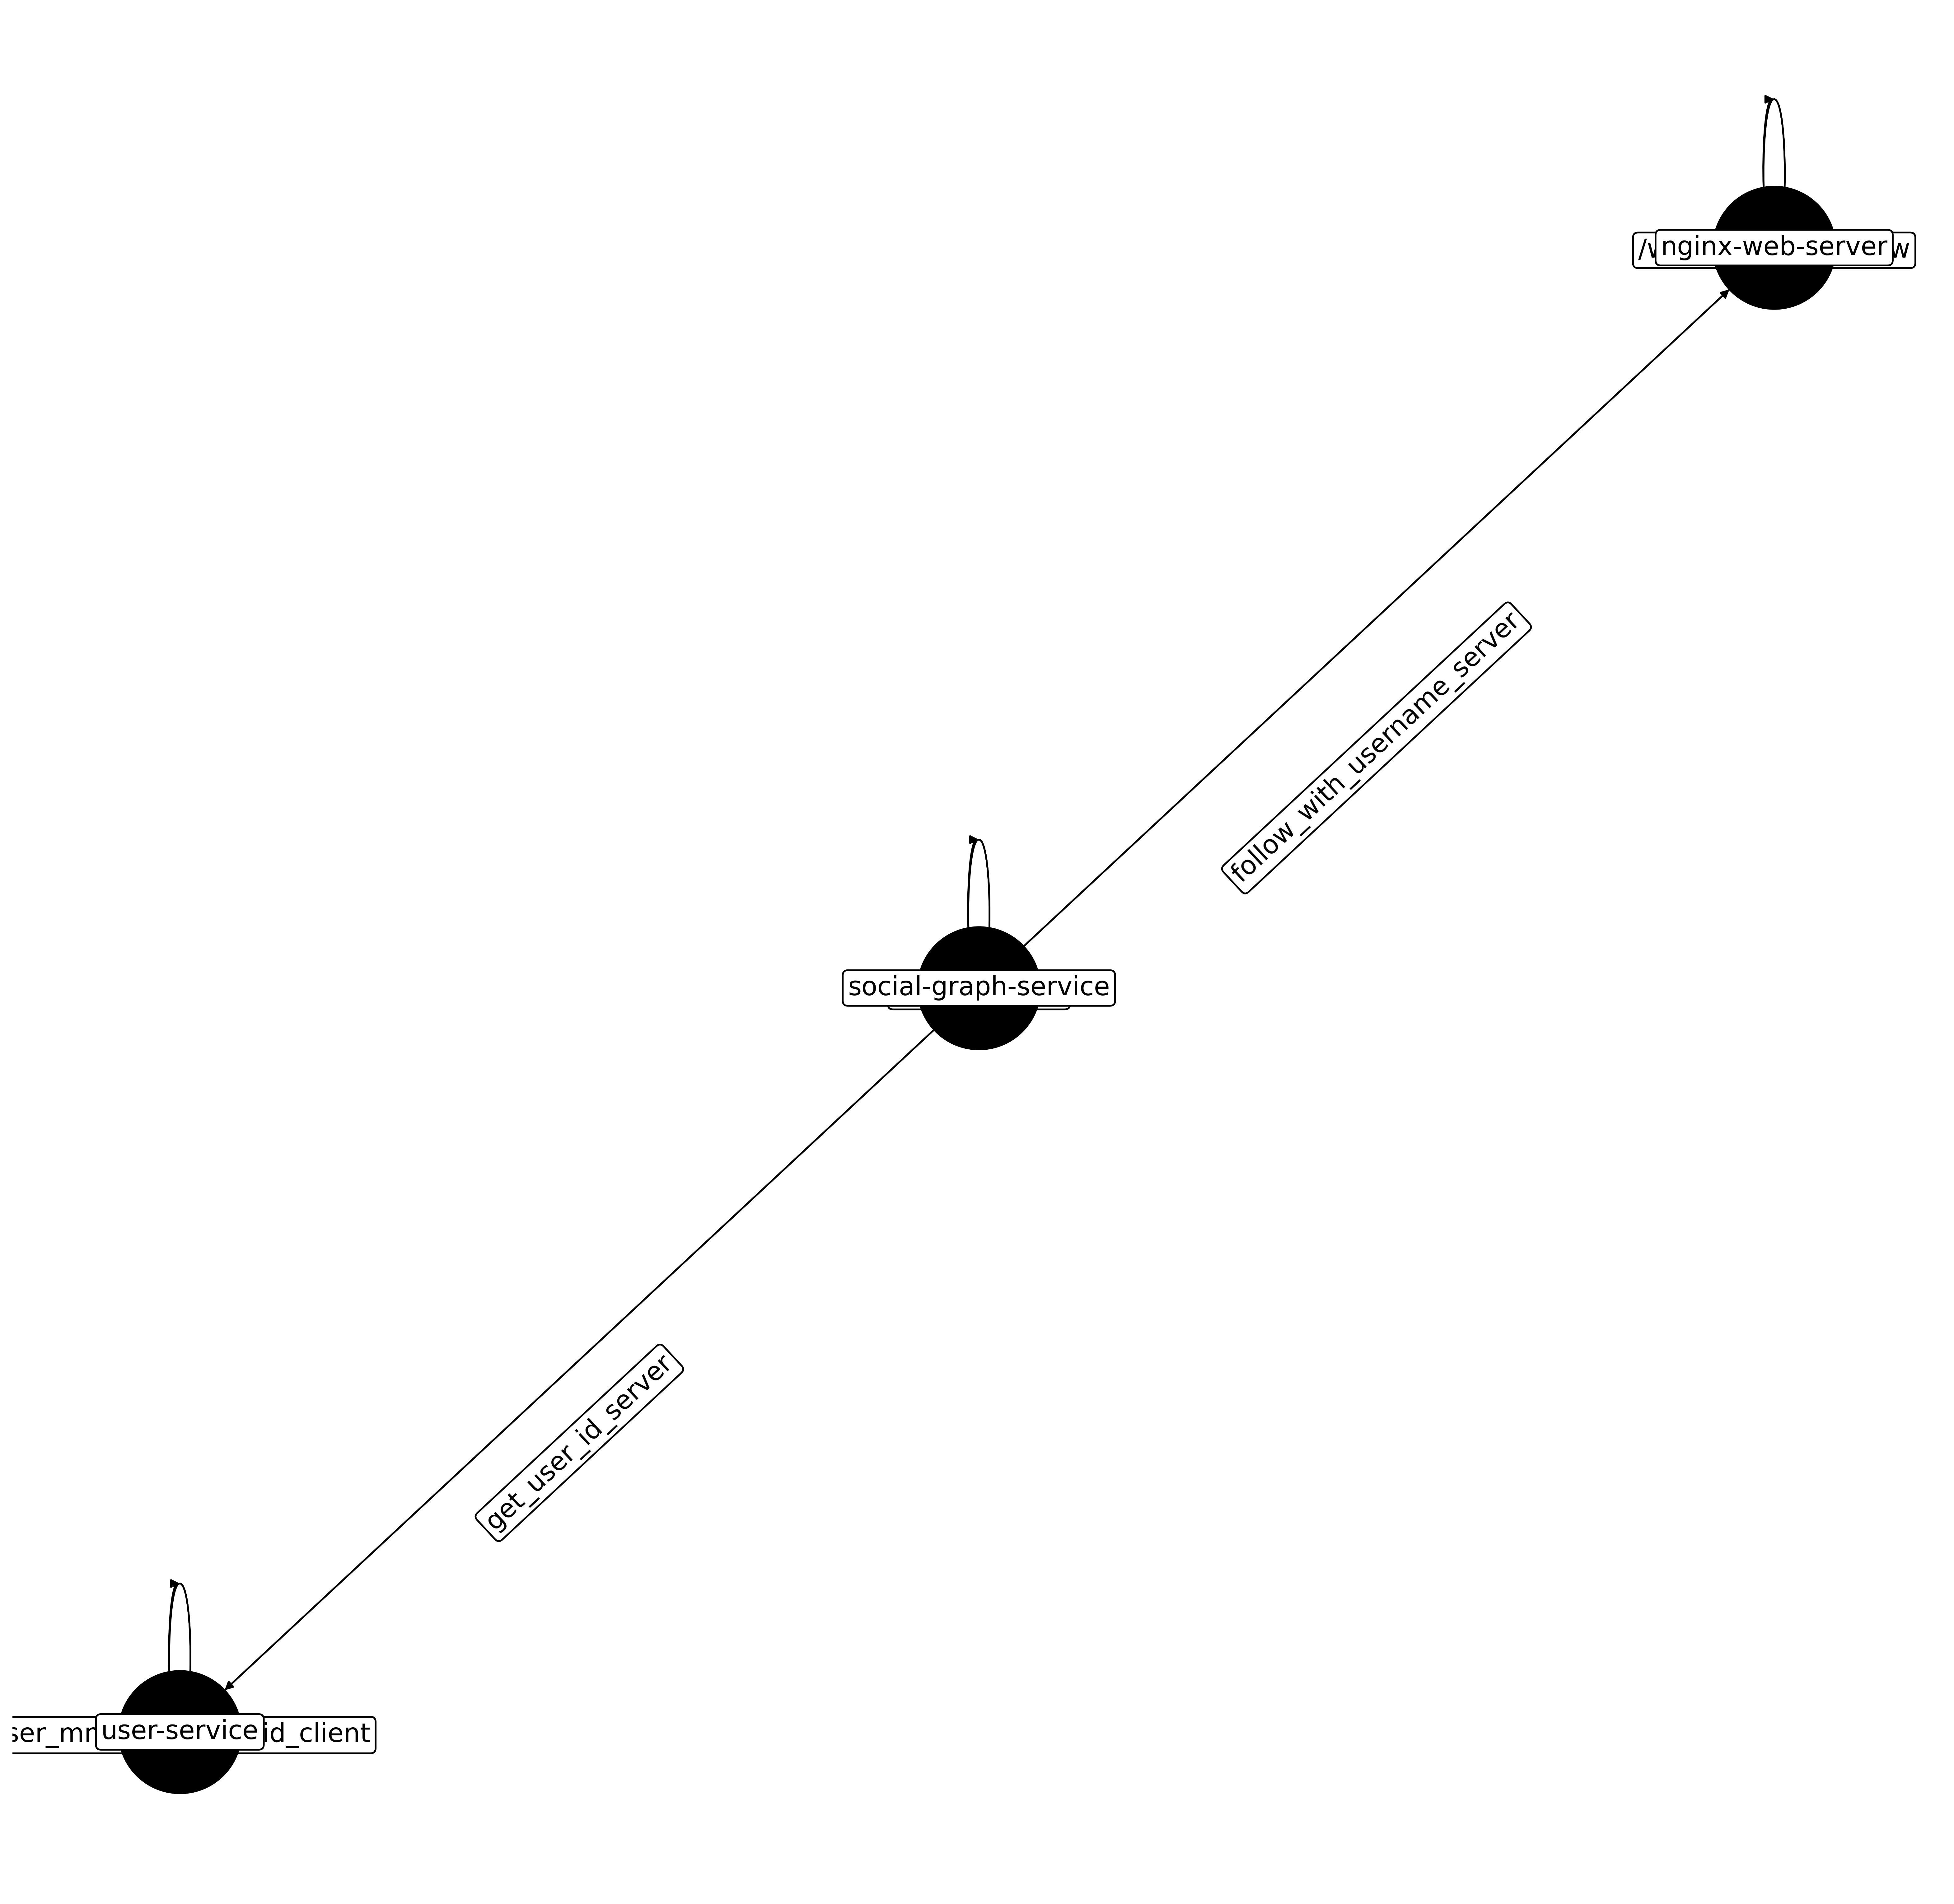


reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-20/user-service.json
tail: al-network.svc.cluster.local:8080/wrk2-api/user/follow"},{"key":"http.host","type":"string","value":
reading failed:  Expecting value: line 1 column 46001868 (char 46001867)

reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-20/user-timeline-service.json
tail: ags":[{"key":"internal.span.format","type":"string","value":"proto"}],"logs":[],"processID":"p2","wa
reading failed:  Unterminated string starting at: line 1 column 87109004 (char 87109003)


In [ ]:
success = 0
for elem in onlyfiles:
    print()
    print("reading " + mypath + "/" + elem)
    file = open( mypath + "/" + elem,'r')  
    lines = file.read()   
    print("tail: "+lines[-100:])
    try:
        inspect_trace_v3(mypath+ "/" + elem)
        success +=1
    except Exception as e:
        print("reading failed: ", e)

In [ ]:
print("Sample 20 files successfully read: " + str(success) + "/" + str(len(onlyfiles)))

Sample 20 files successfully read: 1/7


In [ ]:
mypath= os.getcwd() + '/social-network/sample-rate-50' 
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles

['user-timeline-service.json',
 'post-storage-service.json',
 'jaeger-query.json',
 'nginx-web-server.json',
 'user-service.json',
 'social-graph-service.json',
 'metadata.txt']

'nginx-web-server.json' seems to not be corrupted, in this case the reading does not fails, however when skipping the corrupted traces (22) there is no standard deviation in the number of entities (v2 fixed), but also there is no stddev in the number of relations, differently from v1


reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-50/user-timeline-service.json
tail: internal.span.format","type":"string","value":"proto"}],"logs":[],"processID":"p1","warnings":null},
reading failed:  Expecting value: line 1 column 86515526 (char 86515525)

reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-50/post-storage-service.json
tail: 80849555000,"duration":803,"tags":[{"key":"sampler.type","type":"string","value":"probabilistic"},{"
reading failed:  Unterminated string starting at: line 1 column 91237473 (char 91237472)

reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-50/jaeger-query.json
tail: e":"string","value":"Go-2.30.0"}]}},"warnings":null}],"total":0,"limit":0,"offset":0,"errors":null}

The number of traces is:  2
reading failed:  the null graph has no paths, thus there is no averageshortest path length

reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-50/nginx-w

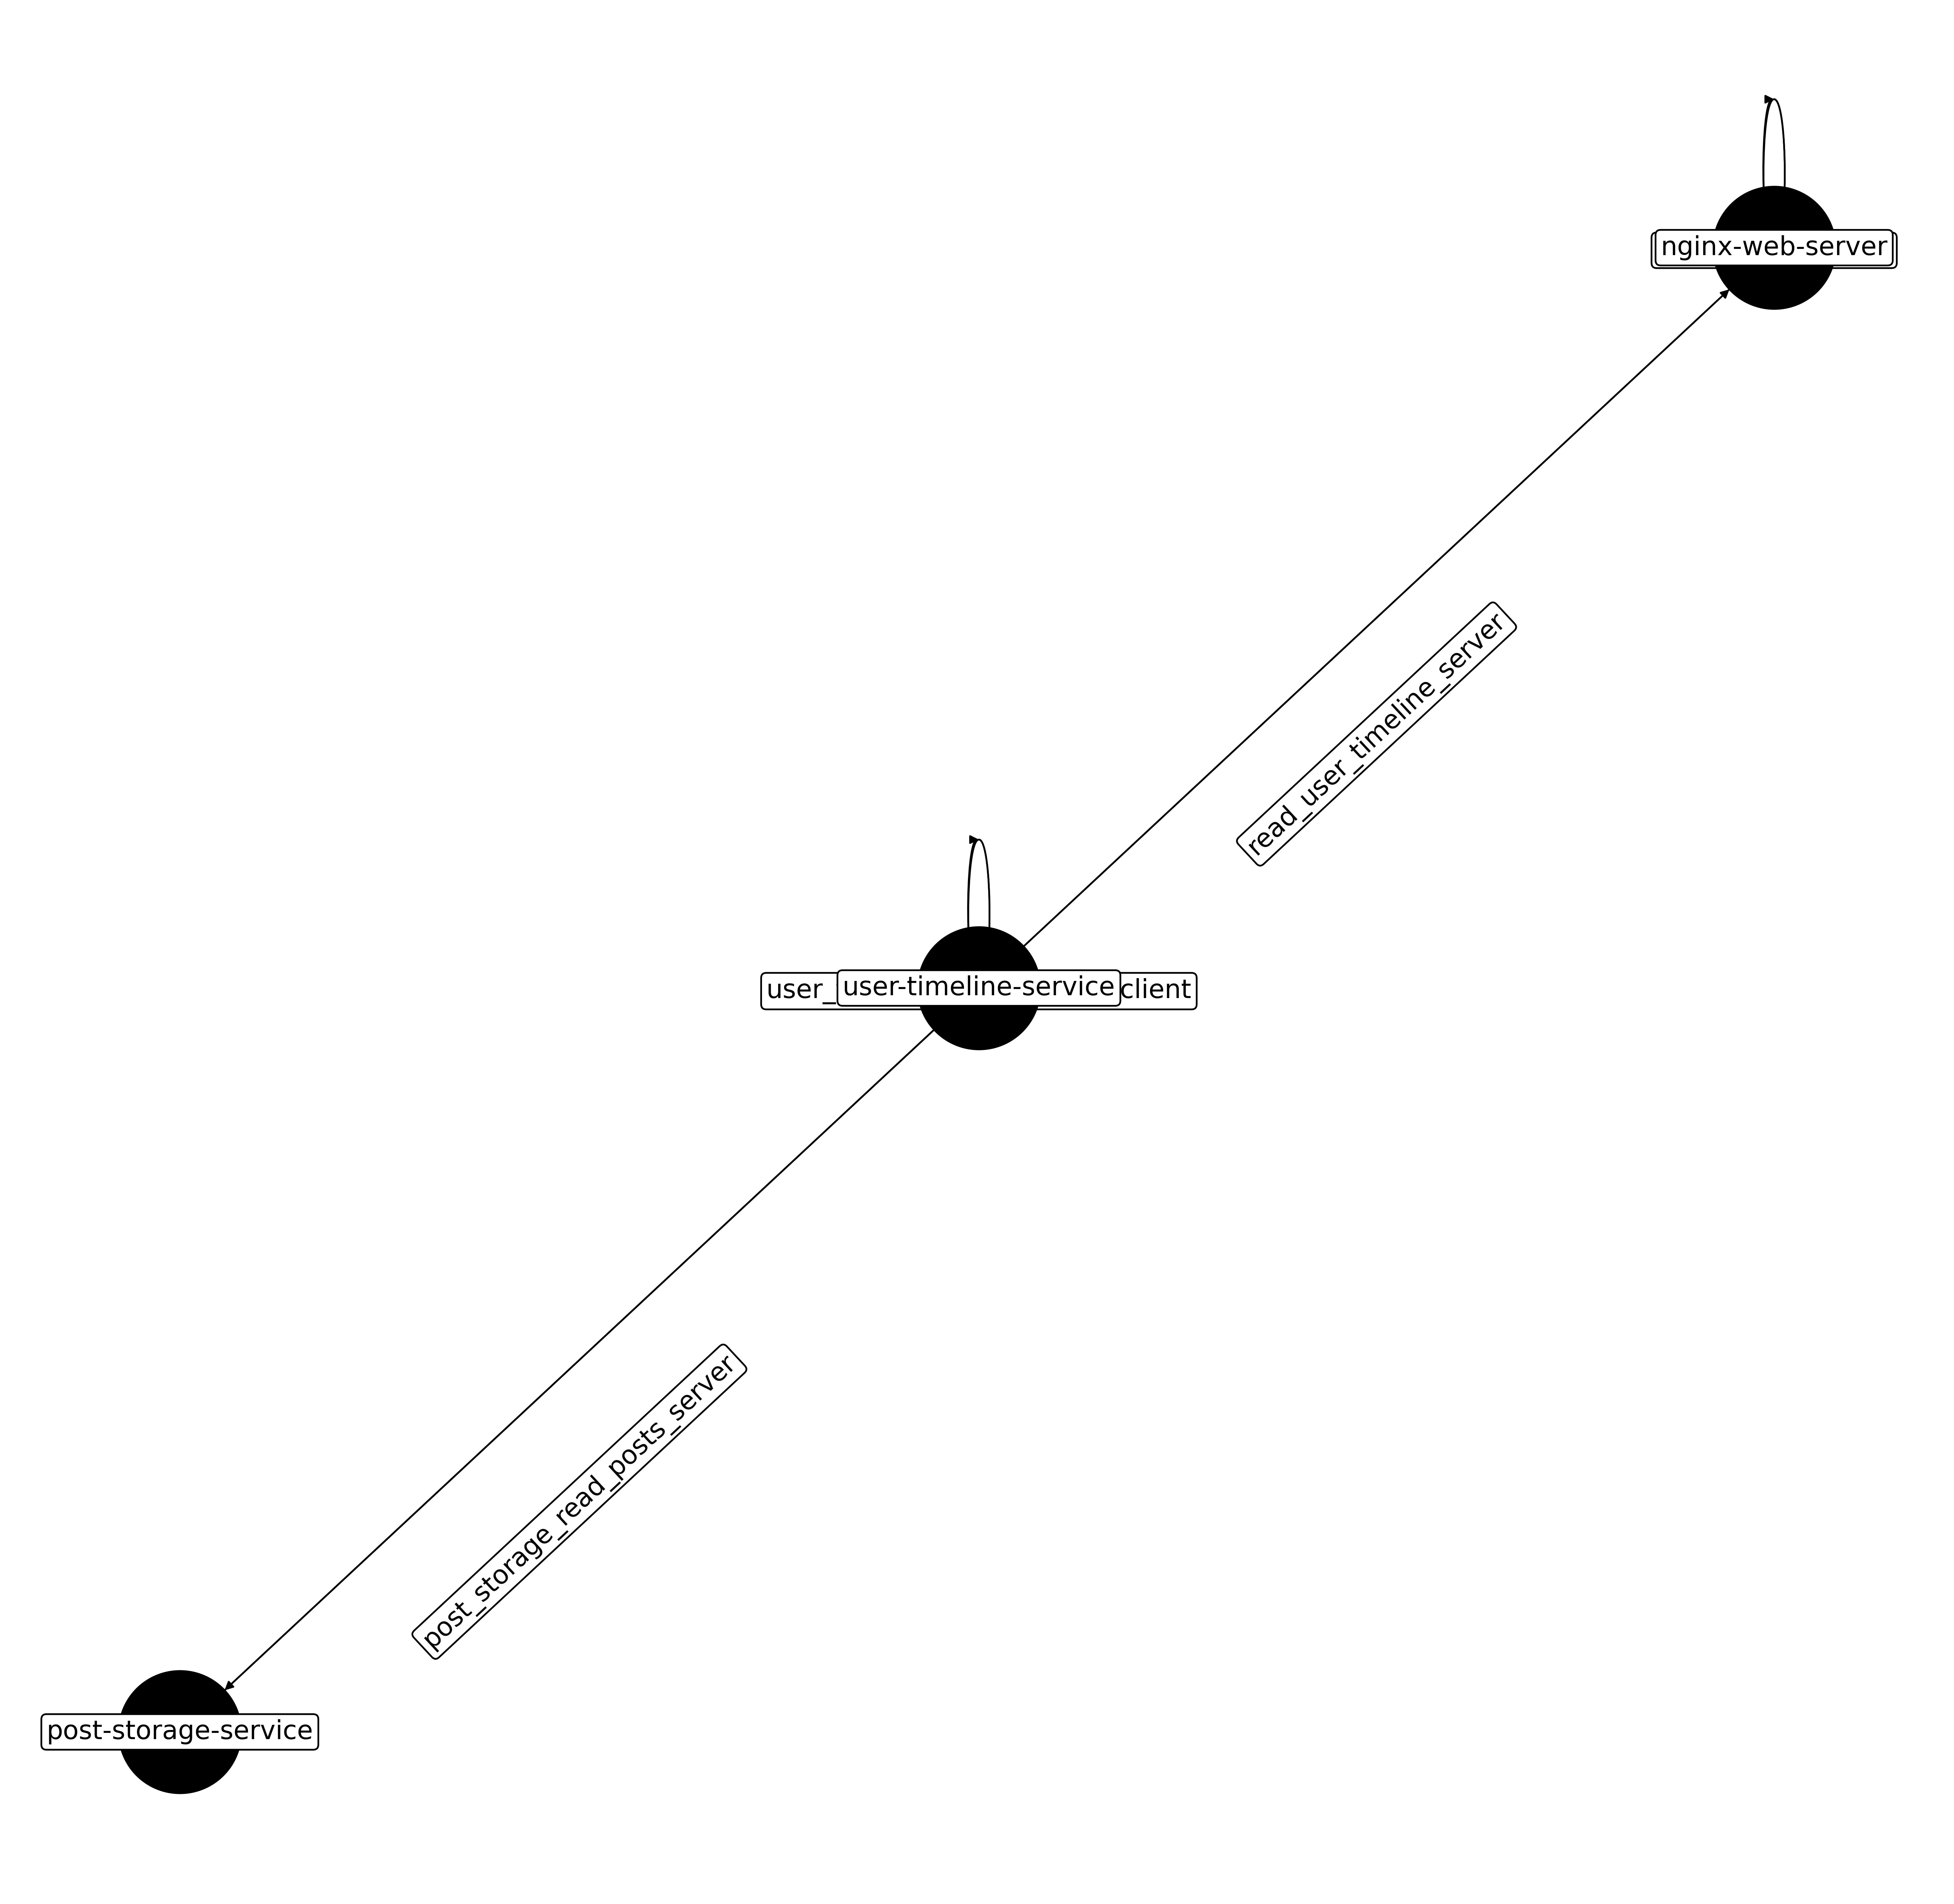


reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-50/user-service.json
tail: 9"}],"startTime":1675878903670470,"duration":314,"tags":[{"key":"internal.span.format","type":"strin
reading failed:  Unterminated string starting at: line 1 column 113384782 (char 113384781)

reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-50/social-graph-service.json
tail: onName":"get_user_id_server","references":[{"refType":"CHILD_OF","traceID":"37fab9792b84ea6a","spanI
reading failed:  Unterminated string starting at: line 1 column 115527620 (char 115527619)

reading /gdrive/MyDrive/Gianluca - Master Thesis/social-network/sample-rate-50/metadata.txt
tail: Benchmark: social-network
Sampling rate: .5
Request rate: 2000 reqs/sec
Duration: 30mins
reading failed:  Expecting value: line 1 column 1 (char 0)


In [ ]:
success = 0
for elem in onlyfiles:
    print()
    print("reading " + mypath + "/" + elem)
    file = open( mypath + "/" + elem,'r')  
    lines = file.read()   
    print("tail: "+lines[-100:])
    try:
        inspect_trace_v3(mypath+ "/" + elem)
        success +=1
    except Exception as e:
        print("reading failed: ", e)

In [ ]:
print("Sample 50 files successfully read: " + str(success) + "/" + str(len(onlyfiles)))

Sample 50 files successfully read: 1/7


In [ ]:
mypath= os.getcwd() + '/social-network/sample-rate-100' 
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles

['user-timeline-service.json',
 'post-storage-service.json',
 'nginx-web-server.json',
 'user-service.json',
 'social-graph-service.json',
 'metadata.txt']

the files seem to be not corrupted however, in this case the reading does not fails. however when skipping the corrupted traces (~50) there is no standard deviation in the number of entities (v2 fixed),and in some cases there is no stddev in the number of relations, differently from v1

In [ ]:
success = 0
for elem in onlyfiles:
    print()
    print("reading " + mypath + "/" + elem)
    file = open( mypath + "/" + elem,'r')  
    lines = file.read()   
    print("tail: "+lines[-100:])
    try:
        inspect_trace_v3(mypath+ "/" + elem)
        success +=1
    except Exception as e:
        print("reading failed: ", e)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print("Sample 100 files successfully read: " + str(success) + "/" + str(len(onlyfiles)))

Sample 100 files successfully read: 5/6
